<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>

# 第10章	概率统计

## 10.1	概率论

### 10.1.2	样本空间


In [1]:
a = set('abcd')
b = set(['d', 'e', 'f', 'g'])
print(a, b)

{'c', 'd', 'b', 'a'} {'f', 'd', 'e', 'g'}


In [2]:
print("a ∩ b = ", a & b)
print("a ∩ b = ", b.intersection(a))
print("a ∪ b = ", a | b)
print("a ∪ b = ", b.union(a))

a ∩ b =  {'d'}
a ∩ b =  {'d'}
a ∪ b =  {'a', 'e', 'g', 'c', 'd', 'b', 'f'}
a ∪ b =  {'a', 'e', 'g', 'c', 'd', 'b', 'f'}


In [3]:
print("a - b = ", a - b)
print("a - b = ", a.difference(b))
print("b - a = ", b - a)
print("b - a = ", b.difference(a))


a - b =  {'c', 'b', 'a'}
a - b =  {'c', 'b', 'a'}
b - a =  {'f', 'e', 'g'}
b - a =  {'f', 'e', 'g'}


In [4]:
a^b

{'a', 'b', 'c', 'e', 'f', 'g'}

In [5]:
(a|b) - (a&b)

{'a', 'b', 'c', 'e', 'f', 'g'}

In [6]:
import numpy

a = numpy.array(list('abcd'))
b = numpy.array(list('defg'))
print('a = ', a)
print('b = ', b)
# 比较a和b
print('a ∩ b = :', numpy.intersect1d(a, b))
print('a - b = :', numpy.setdiff1d(a, b))
print('a | b = :', numpy.union1d(a, b))
print('a ^ b = :', numpy.setxor1d(a, b))


a =  ['a' 'b' 'c' 'd']
b =  ['d' 'e' 'f' 'g']
a ∩ b = : ['d']
a - b = : ['a' 'b' 'c']
a | b = : ['a' 'b' 'c' 'd' 'e' 'f' 'g']
a ^ b = : ['a' 'b' 'c' 'e' 'f' 'g']


In [7]:
import numpy
from scipy import stats
import matplotlib.pyplot as plt

#### 10.1.5.1	伯努利分布

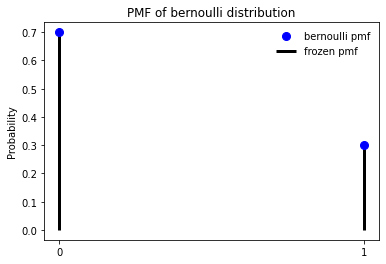

In [8]:
def bernoulli_pmf(p=0.0):
    """
    伯努利分布，只有一个参数
   
    参数
    ____
    p: float
        概率值，默认0
    """
    ber_dist = stats.bernoulli(p)
    x = [0, 1]
    x_name = ['0', '1']
    pmf = ber_dist.pmf(x)
    plt.plot(x, pmf, 'bo', ms=8, label='bernoulli pmf')
    plt.vlines(x, 0, pmf, colors='k', linestyles='-',
               lw=3,label='frozen pmf')
    plt.xticks(x, x_name)
    plt.ylabel('Probability')
    plt.title('PMF of bernoulli distribution')
    plt.legend(loc='best', frameon=False)
    plt.show()

bernoulli_pmf(p=0.3)

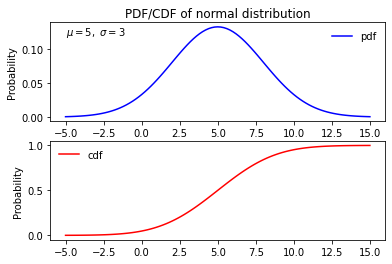

In [5]:
norm_dis = stats.norm(5, 3) # 利用相应的分布函数及参数，创建一个冻结的正态分布(frozen distribution)
x = numpy.linspace(-5, 15, 101)  # 在区间[-5, 15]上均匀的取101个点

# 计算该分布在x中各点的概率密度分布函数值(PDF)
pdf = norm_dis.pdf(x)

# 计算该分布在x中各点的累计分布函数值(CDF)
cdf = norm_dis.cdf(x)

# 下面是利用matplotlib画图
plt.figure(1)
plt.subplot(211)  # 两行一列，第一个子图
plt.plot(x, pdf, 'b-',  label='pdf')
plt.ylabel('Probability')
plt.title(r'PDF/CDF of normal distribution')
plt.text(-5.0, .12, r'$\mu=5,\ \sigma=3$')  # 3是标准差，不是方差
plt.legend(loc='best', frameon=False)
# plot cdf
plt.subplot(212)
plt.plot(x, cdf, 'r-', label='cdf')
plt.ylabel('Probability')
plt.legend(loc='best', frameon=False)

plt.show()

### 伯努利分布

伯努利分布（英语：Bernoulli distribution），又名两点分布或者0-1分布，是一个离散型概率分布，为纪念瑞士科学家雅各布·伯努利而命名。
若伯努利试验成功，则伯努利随机变量取值为1。若伯努利试验失败，则伯努利随机变量取值为0。记其成功概率为${𝑝(0≤𝑝≤1)}$，失败概率为${𝑞=1−𝑝}$。

则其概率质量函数（PMF）为：
$${P_{X}(x)=\begin{cases}
p & \text{ if } x=1 \\ 
1-p & \text{ if } x=0 \\ 
0 & \text{ otherwise } 
\end{cases} {0<𝑝<1}}$$

伯努利分布只有一个参数p，记做${𝑋\sim 𝐵𝑒𝑟𝑛𝑜𝑢𝑙𝑙𝑖(𝑝)}$，或${𝑋\sim 𝐵(1,𝑝)}$，读作X服从参数为p的伯努利分布。

伯努利分布应该是所有分布里面最简单的分布，也是二项分布的基本单元。伯努利分布适合于试验结果只有两种可能的单次试验，例如抛硬币和产品质检。这类事件的样本空间中只有两个点，一般取为{0,1}。不同的伯努利分布只是取到这两个值的概率不同。例如，可以将抛一次硬币看作是一次伯努利实验，将正面朝上记做1，反面朝上记做0。那么伯努利分布中的参数p就表示硬币正面朝上的概率。 

以下代码使用柱状图表示伯努利分布的概率质量分布：

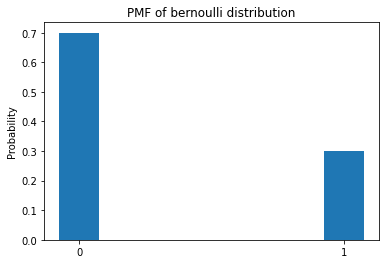

In [4]:
def bernoulli_pmf(p=0.0):
    """
    伯努利分布，只有一个参数
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html#scipy.stats.bernoulli
    :param p: 试验成功的概率，或结果为1的概率
    :return:
    """
    ber_dist = stats.bernoulli(p)
    x = [0, 1]
    x_name = ['0', '1']
    pmf = [ber_dist.pmf(x[0]), ber_dist.pmf(x[1])]
    plt.bar(x, pmf, width=0.15)
    plt.xticks(x, x_name)
    plt.ylabel('Probability')
    plt.title('PMF of bernoulli distribution')
    plt.show()
 
bernoulli_pmf(p=0.3)

### 二项分布

如果把一个伯努利分布独立的重复n次，就得到了一个二项分布。二项分布是最重要的离散型概率分布之一。随机变量𝑋要满足这个分布有两个重要条件：

* 各次试验的条件是稳定的。
* 各次试验之间是相互独立的。

二项分布有两个参数——试验次数𝑛和每次试验成功的概率𝑝. 其概率质量函数为：

$${P_{X}(x)=\begin{cases}
\binom{n}{p}p^k(1-p)^{(n-k)} & \text{ for } k=0,1,2,...,n \\  
0 & \text{ otherwise } 
\end{cases}0<p<1}$$
一个随机变量𝑋服从参数为𝑛和𝑝的二项分布，记做${𝑋\sim 𝐵𝑖𝑛𝑜𝑚𝑖𝑎𝑙(𝑛,𝑝)}$，或${𝑋\sim 𝐵(𝑛,𝑝)}$。

还是利用抛硬币的例子来比较伯努利分布和二项分布：如果将抛一次硬币看作是一次伯努利实验，且将正面朝上记做1，反面朝上记做0。那么抛n次硬币，记录正面朝上的次数𝑌，𝑌就服从二项分布。假如硬币是均匀的，𝑌的取值应该大部分都集中在𝑛/2附近，而非常大或非常小的值都很少。由此可见，二项分布关注的是计数，伯努利分布关注的是比值（正面朝上的计数/n）。 

现实生活中有许多现象程度不同地符合这些条件，例如经常用来举例子的抛硬币，掷骰子等。
如果每次试验条件都相同，那么硬币正面朝上的次数以及骰子某一个面朝上的次数都是典型的符合二项分布的随机变量。
均匀硬币抛1000次，则正面朝上的次数${𝑋\sim 𝐵𝑖𝑛𝑜𝑚𝑖𝑎𝑙(1000,0.5)}$；有六个面的骰子，掷100次，则6点出现的次数${𝑋\sim 𝐵𝑖𝑛𝑜𝑚𝑖𝑎𝑙(100,\frac{1}{6})}$

假设一枚不均匀的硬币20次，其中正面朝上的概率为0.6。下面的代码用来模拟每次试验抛20次，做5次这样的试验。

In [17]:
def binom_dis(n=1, p=0.1, times=5):
    """
    二项分布，模拟试验中成功的次数
    
    入参
    ____
    n: int
        实验总次数
    p: float
        单次实验成功的概率
    
    返回值
    _____
    success: numpy.int array
        试验成功的次数
    """
    binom_dis = stats.binom(n, p)
    simulation_rst = binom_dis.rvs(size=times)  # 取5个符合该分布的随机变量
    return simulation_rst
 
binom_dis(n=20, p=0.6)

array([ 9, 10, 12, 12, 16])

上面定义了一个𝑛=20,𝑝=0.6的二项分布，意思是说每次试验抛硬币（该硬币正面朝上的概率大于背面朝上的概率）20次并记录正面朝上的次数。
代码中方法rvs的关键字参数size默认是5，表示从符合二项分布的n个数据中随机取5次，以模拟5次抛硬币的试验。由于每次试验抛硬币20次，因此试验结果从0到20都有可能，只是出现的概率不同而已。从以上结果可以看出，5次试验分别得到9、10、12、12、16次正面朝上的结果。

下面的代码绘制一个二项分布的概率质量函数图：

[ 4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.]


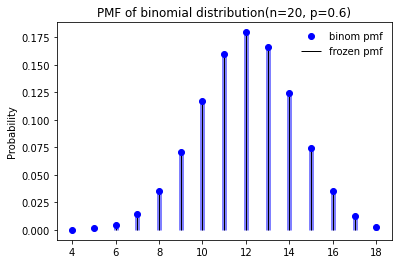

In [9]:
def binom_pmf(n=1, p=0.1):
    """
    绘制二项分布概率质量分布图
    
    入参
    ____
    n: int
        试验次数
    p: float
        单次实验成功的概率
        
    返回值
    _____
        无
    """
    
    x = numpy.arange(stats.binom.ppf(0.0001, n, p), 
                     stats.binom.ppf(0.9999, n, p))
    print(x)
    fig, ax = plt.subplots(1, 1)
    y = stats.binom.pmf(x, n, p)
    ax.plot(x, y, 'bo', label='binom pmf')
    ax.vlines(x, 0, y, colors='b', lw=5, alpha=0.5)
    
    # "frozen" 二项随机变量
    binom_dis = stats.binom(n, p)
    ax.vlines(x, 0, binom_dis.pmf(x), 
              colors='k', label='frozen pmf', lw=1)
    
    ax.legend(loc='best', frameon=False)
    plt.ylabel('Probability')
    plt.title('PMF of binomial distribution(n={}, p={})'.format(n, p))
    plt.show()

binom_pmf(n=20, p=0.6)

从结构中可以明显看到该分布的概率质量分布函数图明显向右边偏移，在𝑥=12处取到最大概率。这是因为这个硬币正面朝上的概率大于反面朝上的概率。

为了比较准确的得到某个服从二项分布的随机变量的期望，需要大量重复二项分布试验，例如有m个人进行试验（每人抛n次），然后利用"所有人得到的正面次数之和/m"来估计𝑛𝑝。总共相当于做了𝑛𝑚次伯努利实验。 


### 泊松分布

日常生活中，大量事件的发生是有固定频率的。例如某医院平均每小时出生3个婴儿，某网站平均每分钟有2次访问等。它们的特点就是，我们可以预估这些事件在某个时间段内发生的总次数，但是没法知道具体的发生时间。已知平均每小时出生3个婴儿，请问下一个小时，会出生几个？

有可能一下子出生6个，也有可能一个都不出生。这是我们没法知道的。

如果某事件以固定强度𝜆，随机且独立地出现，该事件在单位时间内出现的次数（个数）可以看成是服从泊松分布。

泊松分布有一个参数𝜆（有的地方表示为𝜇），表示单位时间（或单位面积）内随机事件的平均发生次数，其PMF表示为：
$${P_{X}(x)=\begin{cases}
e^{-{\lambda}} \frac{ {\lambda}^k}{k!} & \text{ for } k\in R_X \\  
0 & \text{ otherwise } 
\end{cases}}$$

以上表示单位时间上的泊松分布，即 𝑡=1 ，如果表示时间 t 上的泊松分布，上面公式中出现 𝜆 的地方都需要写成 𝜆𝑡。

一个随机变量𝑋服从参数为𝜆的泊松分布，记做𝑋∼𝑃𝑜𝑖𝑠𝑠𝑜𝑛(𝜆)，或𝑋∼𝑃(𝜆)。

泊松分布适合于描述单位时间内随机事件发生的次数的概率分布。如某一服务设施在一定时间内受到的服务请求的次数，电话交换机接到呼叫的次数、汽车站台的候客人数、机器出现的故障数、自然灾害发生的次数、DNA序列的变异数、放射性原子核的衰变数、激光的光子数分布等等。

下面是参数𝜇=8时的泊松分布的概率质量分布图（在scipy中将泊松分布的参数表示为𝜇）：

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]


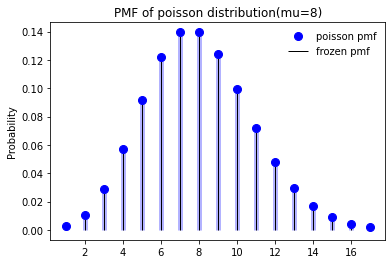

In [26]:
def poisson_pmf(mu=3):
    """
    绘制泊松分布的概率质量分布图
    
    入参
    ___
    mu: int
        单位时间（或单位面积）内随机事件的平均发生的次数
        
    返回值
    _____
        无
    """
    
    x = numpy.arange(stats.poisson.ppf(0.001, mu),
                     stats.poisson.ppf(0.999, mu))
    print(x)
    y = stats.poisson.pmf(x, mu)
    fig, ax = plt.subplots(1, 1)
    ax.plot(x, y, 'bo', ms=8, label='poisson pmf')
    ax.vlines(x, 0, y, colors='b', lw=5, alpha=0.3)
    
    poisson_dis = stats.poisson(mu)
    ax.vlines(x, 0, poisson_dis.pmf(x), colors='k',
              label='frozen pmf', lw=1)
    
    ax.legend(loc='best', frameon=False)
    plt.ylabel('Probability')
    plt.title('PMF of poisson distribution(mu={})'.format(mu))
    plt.show()

poisson_pmf(mu=8)

泊松分布与二项分布的关系

如果仅仅是看二项分布与泊松分布的概率质量分布图，也可以发现它们的相似度非常高。事实上这两个分布内在联系十分紧密。
泊松分布可以作为二项分布的极限得到。一般来说，若𝑋∼𝐵(𝑛,𝑝)，其中𝑛很大，𝑝很小，而𝑛𝑝=𝜆不太大时，则X的分布接近于泊松分布𝑃(𝜆)

从以下代码的结果可以看到两者的关系：

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
[0.01831564 0.07326256 0.14652511 0.19536681 0.19536681 0.15629345
 0.10419563 0.05954036 0.02977018 0.01323119 0.00529248 0.00192454
 0.00064151]


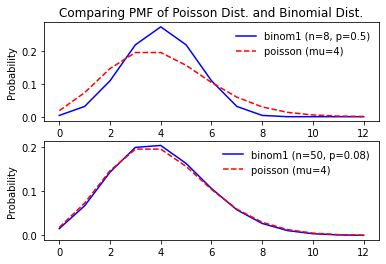

In [28]:
mu=4   # 泊松分布的参数
n1=8   # 第一次二项分布的试验次数
n2=50  # 第二次二项分布的试验次数

# 为了具有可比性, 利用mu = n * p, 计算p
p1 = mu/n1  # 二项分布中的参数，单次实验成功的概率
p2 = mu/n2

poisson_dist = stats.poisson(mu)   # 初始化泊松分布
binom_dist1 = stats.binom(n1, p1)  # 初始化第一个二项分布
binom_dist2 = stats.binom(n2, p2)  # 初始化第二个二项分布

# 计算pmf
X = numpy.arange(poisson_dist.ppf(0.0001), poisson_dist.ppf(0.9999))
y_po = poisson_dist.pmf(X)
print(X)
print(y_po)
y_bi1 = binom_dist1.pmf(X)
y_bi2 = binom_dist2.pmf(X)

# 作图
# First group
# 当n比较小，p比较大时，两者差别比较大
plt.figure(1)
plt.subplot(211)
plt.plot(X, y_bi1, 'b-', label='binom1 (n={}, p={})'.format(n1, p1))
plt.plot(X, y_po, 'r--', label='poisson (mu={})'.format(mu))
plt.ylabel('Probability')
plt.title('Comparing PMF of Poisson Dist. and Binomial Dist.')
plt.legend(loc='best', frameon=False)

# second group
# 当n比较大，p比较小时，两者非常相似
plt.subplot(212)
plt.plot(X, y_bi2, 'b-', label='binom1 (n={}, p={})'.format(n2, p2))
plt.plot(X, y_po, 'r--', label='poisson (mu={})'.format(mu))
plt.ylabel('Probability')
plt.legend(loc='best', frameon=False)
plt.show()


### 自定义分布函数以及经验分布函数

从本质上讲，只要满足"概率密度（质量）函数的性质"的函数都可以作为分布函数，对于离散型随机变量就是：

* 所有可能取值被取到的概率不小于0；
* 所有以上概率的和等于1。

根据上面的条件，我们完全可以自定义无数个不同与上述三类分布的离散型随机变量。

 

**自己定义分布函数**

下面代码通过创建一个rv_discrete的实例，定义了一个取值范围为{0,1,2,3,4,5,6}的离散型分布，并做出了该分布的PMF图：

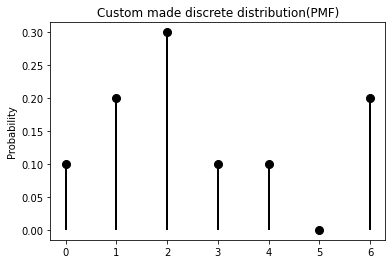

In [31]:
xk = numpy.arange(7)                      # 所有可能的取值
pk = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)  # 各个取值的概率
custm = stats.rv_discrete(name='custm', values=(xk, pk))

fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm.pmf(xk), 'ko', ms=8)
ax.vlines(xk, 0, custm.pmf(xk), colors='k', linestyles='-', lw=2)
plt.title('Custom made discrete distribution(PMF)')
plt.ylabel('Probability')
plt.show()

**经验分布函数**

该分布的取值就是0-6这7个数字，但是取到这几个数字的概率是不同的，其中取到2的概率最大（p(2) = 0.3），而取到5的概率为0（也就是说几乎不可能取到5）。我们利用上面的概率分布，取20个数（即从该分布中进行抽样，每抽一次样就相当于做了一次试验），代码如下：

[2 6 3 2 1 6 6 4 2 4 4 3 1 6 4 2 1 2 1 2]
[1 2 3 4 6]
[4 6 2 4 4]
[0.2 0.3 0.1 0.2 0.2]


Text(0.5, 1.0, 'Theoretical dist. PMF vs Empirical dist. PMF')

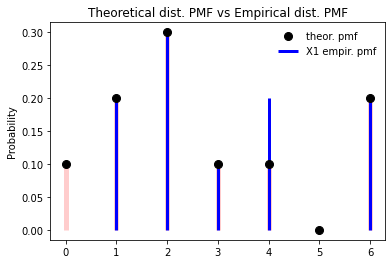

In [39]:
X1 = custm.rvs(size=20)  # 第一次抽样
print(X1)
val1, cnt1 = numpy.unique(X1, return_counts=True)
print(val1)
print(cnt1)
pmf_X1 = cnt1 / len(X1)  # 经验分布概率质量
print(pmf_X1)
plt.figure()
plt.plot(xk, custm.pmf(xk), 'ko', ms=8, label='theor. pmf')
plt.vlines(xk, 0, custm.pmf(xk), colors='r', lw=5, alpha=0.2)
plt.vlines(val1, 0, pmf_X1, colors='b', linestyles='-',
           lw=3, label='X1 empir. pmf')
plt.legend(loc='best', frameon=False)
plt.ylabel('Probability')
plt.title('Theoretical dist. PMF vs Empirical dist. PMF')

[2 2 4 0 2 2 2 1 6 1 3 0 2 2 1 2 2 6 6 6] 
观察上面的结果可以发现（注意：每次运行结果可能不同）：

    p(0) = 2/20 = 0.1;
    p(1) = 3/20 = 0.15;
    p(2) = 9/20 = 0.45;
    p(3) = 1/20 = 0.05;
    p(4) = 1/20 = 0.05;
    p(5) = 0/20 = 0;
    p(6) = 4/20 = 0.2.

上面各个数取到的概率是通过具体的试验结果计算出来的，同时也符合"概率质量函数的性质"，因此叫做经验分布。
从计算结果来看，经验分布各个结果取到的概率和其抽样的分布函数（自定义的分布函数）给定的概率几乎相同。
但由于抽样次数只有20次，因此与原分布中的概率还是有差异。

下面将抽样次数提升到2000次，再做一次比较：

[0 1 2 3 4 6]
[201 431 582 194 208 384]
[0.1005 0.2155 0.291  0.097  0.104  0.192 ]


Text(0.5, 1.0, 'Theoretical dist. PMF vs Empirical dist. PMF')

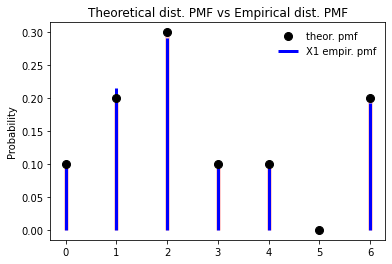

In [42]:
X1 = custm.rvs(size=2000)  # 第一次抽样
val1, cnt1 = numpy.unique(X1, return_counts=True)
print(val1)
print(cnt1)
pmf_X1 = cnt1 / len(X1)  # 经验分布概率质量
print(pmf_X1)
plt.figure()
plt.plot(xk, custm.pmf(xk), 'ko', ms=8, label='theor. pmf')
plt.vlines(xk, 0, custm.pmf(xk), colors='r', lw=5, alpha=0.2)
plt.vlines(val1, 0, pmf_X1, colors='b', linestyles='-',
           lw=3, label='X1 empir. pmf')
plt.legend(loc='best', frameon=False)
plt.ylabel('Probability')
plt.title('Theoretical dist. PMF vs Empirical dist. PMF')

从结果可以看到，经验分布已经和理论分布非常接近了。

## 一维连续型随机变量及其Python实现

离散型随机变量的可能取值只有有限多个或是无限可数的（可以与自然数一一对应），连续型随机变量的可能取值则是一段连续的区域或是整个实数轴，是不可数的。最常见的一维连续型随机变量有三种：均匀分布，指数分布和正态分布。下面还是主要从概述、定义、主要用途和Python的实现几个方面逐一描述。


### 均匀分布

均匀分布算是最简单的连续型概率分布。因为其概率密度是一个常数，不随随机变量X取值的变化而变化。
 
**定义**

如果连续型随机变量 𝑋具有如下的概率密度函数，则称 𝑋 服从${[𝑎,𝑏]}$ 上的均匀分布（uniform distribution）,
记作${𝑋\sim 𝑈(𝑎,𝑏)}$ 或 ${𝑋\sim 𝑈𝑛𝑖𝑓(𝑎,𝑏)}$
$${f_X(x)=\begin{cases}
\frac{1}{b-a} & \text{} a<x<b \\ 
0 & \text{}  x<a \ or \ x>b
\end{cases}}$$

均匀分布具有等可能性，也就是说，服从 𝑈(𝑎,𝑏) 上的均匀分布的随机变量 𝑋 落入 (𝑎,𝑏)中的任意子区间上的概率只与其区间长度有关，与区间所处的位置无关。

由于均匀分布的概率密度函数是一个常数，因此其累积分布函数是一条直线，即随着取值在定义域内的增加，累积分布函数值均匀增加。
$${F_X(x)=\begin{cases}
0 & \text{ if } x<a \\ 
\frac{x-a}{b-a} & \text{ if } a\leq x \leq b \\ 
1 & \text{ if } x>b 
\end{cases}}$$

**主要用途**

* 设通过某站的汽车10分钟一辆，则乘客候车时间 𝑋在 [0,10]上服从均匀分布；
* 某电台每个20分钟发一个信号，我们随手打开收音机，等待时间 𝑋 在 [0,20]上服从均匀分布；
* 随机投一根针与坐标纸上，它和坐标轴的夹角 𝑋 在 [0,π] 上服从均匀分布。
 

**Python实现**

从定义可以看出来，定义一个均匀分布需要两个参数，定义域区间的起点 𝑎和终点 𝑏，但是在Python中是 location 和 scale, 分别表示起点和区间长度。

[2.004 4.    5.996]
True


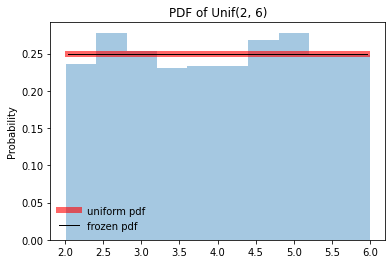

In [44]:
def uniform_distribution(loc=0, scale=1):
    """
    绘制均匀分布的概率密度分布
    
    入参
    ___
    loc: float
        该分布的起点
    scale: float
        该分布的区间长度
        
    返回
    ____
        无
    """

    fig, ax = plt.subplots(1, 1)

    x = numpy.linspace(stats.uniform.ppf(0.01, loc=2, scale=4),
                       stats.uniform.ppf(0.99, loc=2, scale=4),
                       100)
    
    # 根据入参绘制概率密度
    ax.plot(x, stats.uniform.pdf(x, loc=loc, scale=scale), 'r-',
            lw=6, alpha=0.6, label='uniform pdf')

    # 冻结该分布函数
    uniform_dis = stats.uniform(loc=loc, scale=scale)
    ax.plot(x, uniform_dis.pdf(x), 'k-',
            lw=1, label='frozen pdf')

    # 计算ppf分别等于0.001, 0.5, 0.999时的x值
    vals = uniform_dis.ppf([0.001, 0.5, 0.999])
    print(vals)  # [ 2.004  4.     5.996]

    # 验证cdf和ppf
    print(numpy.allclose([0.001, 0.5, 0.999], uniform_dis.cdf(vals)))  # Ture

    r = uniform_dis.rvs(size=1000)
    ax.hist(r, density=True, histtype='stepfilled', alpha=0.4)
    plt.ylabel('Probability')
    plt.title(r'PDF of Unif({}, {})'.format(loc, loc+scale))
    ax.legend(loc='best', frameon=False)
    plt.show()

uniform_distribution(loc=2, scale=4)

### 指数分布

其实指数分布和离散型的泊松分布之间有很大的关系。泊松分布表示单位时间（或单位面积）内随机事件的平均发生次数，指数分布则可以用来表示独立随机事件发生的时间间隔。
由于发生次数只能是自然数，所以泊松分布自然就是离散型的随机变量；而时间间隔则可以是任意的实数，因此其定义域是${(0,+∞)}$。

**定义**
如果一个随机变量𝑋的概率密度函数满足以下形式，就称𝑋为服从参数 𝜆 的指数分布(Exponential Distribution)，记做${𝑋\sim 𝐸(𝜆)}$ 或 ${𝑋\sim 𝐸𝑥𝑝(𝜆)}$。


$${f_X(x)=\begin{cases}
{\lambda}e^{-{\lambda}x} & \text{ if } x>0 \\ 
0 & \text{ otherwise } 
\end{cases}𝜆>0}$$

**主要用途**

    表示独立随机事件发生的时间间隔，比如旅客进机场的时间间隔、中文维基百科新条目出现的时间间隔等；
    在排队论中，一个顾客接受服务的时间长短也可以用指数分布来近似；
    无记忆性的现象（连续时间）。

**性质**

指数分布的一个显著的特点是其具有无记忆性。
例如排队的顾客接受服务的时间长短服从指数分布，那么无论你已经排了多久时间的队，再排t分钟的概率始终是相同的。

用公式表示就是：
$${P(X\geq s +t|X\geq s)=P(X\geq t)}$$



**Python 实现**

这里的参数与实际指数分布的参数有点不一样，参考下面代码中的注释。


[2.00100067e-03 1.38629436e+00 1.38155106e+01]
True


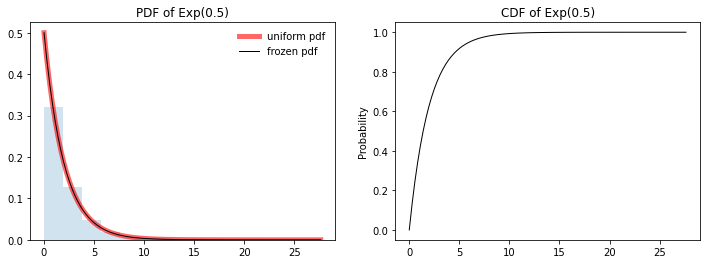

In [4]:
def exponential_dis(loc=0, scale=1.0):
    """
    绘制指数分布的概率密度分布
    
    入参
    ____
    loc: flaot
        定义域的左端点，相当于将整体分布沿x轴平移loc
    scale: float
        lambda的倒数，loc + scale表示该分布的均值，
        scale^2表示该分布的方差
        
    返回值
    _____
        无
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(12,4))

    # 直接传入参数绘制pdf
    x = numpy.linspace(stats.expon.ppf(0.000001, loc=loc, scale=scale),
                       stats.expon.ppf(0.999999, loc=loc, scale=scale),
                       100)
    ax[0].plot(x, stats.expon.pdf(x, loc=loc, scale=scale), 'r-',
            lw=5, alpha=0.6, label='uniform pdf')

    # 冻结的指数分布并取值
    exp_dis = stats.expon(loc=loc, scale=scale)
    ax[0].plot(x, exp_dis.pdf(x), 'k-',
               lw=1, label='frozen pdf')

    ax[1].plot(x, exp_dis.cdf(x), 'k-',
               lw=1, label='frozen pdf')
    # 计算ppf分别等于0.001, 0.5, 0.999时的x值
    x1 = [0.001, 0.5, 0.999]
    vals = exp_dis.ppf(x1)
    print(vals)

    # 验证cdf和ppf
    print(numpy.allclose(x1, exp_dis.cdf(vals)))

    r = exp_dis.rvs(size=10000)
    ax[0].hist(r, density=True, histtype='stepfilled', alpha=0.2)
    plt.ylabel('Probability')
    ax[0].set_title(r'PDF of Exp({})'.format(1/scale))
    ax[0].legend(loc='best', frameon=False)
    ax[1].set_title(r'CDF of Exp({})'.format(1/scale))
    plt.show()

exponential_dis(loc=0, scale=2)

接下来我们通过代码比较不同的lambda值下，指数分布的差异

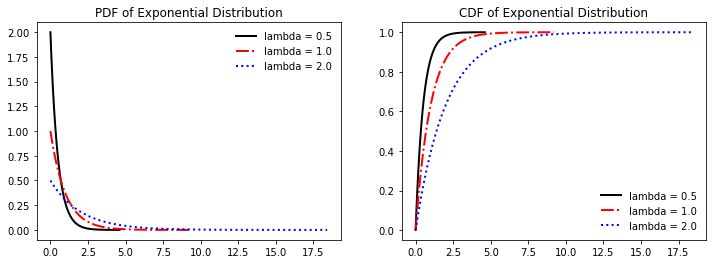

In [102]:
# 不同参数下的指数分布
exp_dis_param = numpy.dtype([('scale','f4'), 
                         ('line_sytle', numpy.str_, 2), 
                         ('line_color', numpy.str_, 2)]) 
exp_dis_params = numpy.array([
    (0.5, '-', 'k'),
    (1, "-.", 'r'),
    (2, ':', 'b')], dtype=exp_dis_param
) 

fig, ax = plt.subplots(1, 2, figsize=(12,4))
with numpy.nditer(exp_dis_params) as it:
    for i in it:
        scale = i['scale']
        exp_dis = stats.expon(scale=scale)
        x = numpy.linspace(exp_dis.ppf(0.001),
                            exp_dis.ppf(0.9999), 100)        
        l = str(i['line_sytle'])
        color = str(i['line_color'])
        ax[0].plot(x, exp_dis.pdf(x), c=color, ls=l,
                   lw=2, label=r'lambda = {}'.format(scale))
        ax[1].plot(x, exp_dis.cdf(x), c=color, ls=l,
                   lw=2, label=r'lambda = {}'.format(scale))

#plt.ylabel('Probability')
ax[0].set_title(r'PDF of Exponential Distribution')
ax[1].set_title(r'CDF of Exponential Distribution')
ax[0].legend(loc='best', frameon=False)
ax[1].legend(loc='best', frameon=False)
plt.show()


观察发现：在接近y轴时，随着λ的增加，分布曲线会愈发陡峭。

由于在指数分布中，参数λ>0被称为速率参数(rate parameter)。即每单位时间内发生该事件的次数。所以在给定的时间间隔内，λ值越大事件发生的可能性越高。

1.先看λ=1.0这条曲线。关注到这条曲线上横坐标为2的点，其意义是2个单位时间该事件发生1次的概率。换个方法说，就是第k次该事件发生后隔2个单位时间发生第k+1次该事件的概率。如果是横坐标为4的点，则其意义便是4个单位时间内该事件发生1次的概率。

2.再看λ=1.5这条曲线。与上述描述类似，先关注到这曲线上横坐标为2的点，其意义是2个单位时间内该事件发生1.5次的概率。同样地，换个说法，也就是第k次该事件发生后隔2个单位时间该事件发生第k+1.5次的概率。

### 正态分布

正态分布也许是出现频率最高的分布，其他人对正态分布的熟悉程度应该也是所有分布中最高的。由于中心极限定理的存在，正态分布也是所有分布应用最广泛的分布。

**定义**

若随机变量 X 的概率密度符合下面的形式，就称 X 服从参数为 𝜇,𝜎的正态分布（或高斯分布），记为${𝑋\sim 𝑁(𝜇,𝜎^2)}$。
$${f_X(x)=\frac{1}{\sqrt{2\pi}\sigma }exp\left \{- \frac{(x-\mu )^2}{2 {\sigma}^2} \right \},\qquad \text{ for all x}\in \mathbb{R}}$$

如果上面公式中${𝜇=0,𝜎=1}$，就叫做标准正态分布，一般记做${𝑍\sim 𝑁(0,1)}$。

由于标准正态分布在统计学中的重要地位，它的累积分布函数（CDF）有一个专门的表示符号：Φ。 一般在统计相关的书籍附录中的“标准正态分布函数值表”就是该值与随机变量的取值之间的对于关系。

正态分布中两个参数含义：

* 当固定 𝜎，改变 𝜇 的大小时，f(x) 图形的形状不变，只是沿着 x 轴作平移变换，因此 𝜇被称为位置参数（决定对称轴的位置）；
* 当固定 𝜇，改变 𝜎 的大小时， f(x) 图形的对称轴不变，形状改变， 𝜎 越小，图形越高越瘦， 𝜎 越大，图形越矮越胖，因此 𝜎 被称为尺度参数（决定曲线的分散程度）

 
**性质**

* ${f(x)}$ 关于${𝑥=𝜇}$对称；
* 当${𝑥≤𝜇}$时，${f(x)}$是严格单调递增函数；
* ${𝑓_{𝑚𝑎𝑥}=𝑓(𝜇)=\frac{1}{\sqrt{2𝜋}𝜎}}$；
* 当${𝑋\sim 𝑁(𝜇,𝜎^2)}$时，${\frac{𝑋−𝜇}{𝜎}\sim 𝑁(0,1)}$

利用第4条性质，在计算一般正态分布的概率时，可以转化为标准正态分布函数来计算。

 

**Python实现**

pdf 和 cdf 图如下代码实现。

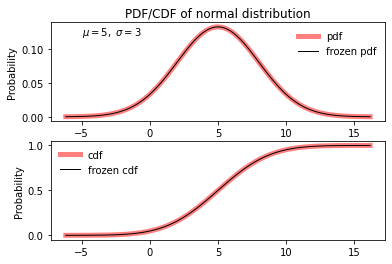

In [10]:
def normal_dis(miu=0, sigma=1):
    """
    正态分布有两个参数
    :param miu: 均值
    :param sigma: 标准差
    :return:
    """

    # 在分布区间[-5, 15]上均匀的取101个点
    x = numpy.linspace(stats.norm.ppf(0.0001, miu, sigma),
                       stats.norm.ppf(0.9999, miu, sigma),
                       101)

    # 计算该分布在x中个点的概率密度分布函数值(PDF)
    pdf = stats.norm.pdf(x, miu, sigma)

    # 计算该分布在x中个点的累计分布函数值(CDF)
    cdf = stats.norm.cdf(x, miu, sigma)
    
    # 创建一个冻结的正态分布(frozen distribution)
    norm_dis = stats.norm(miu, sigma)
    
    # 下面是利用matplotlib画图
    fig, ax = plt.subplots(2, 1)
    # plot pdf
    ax[0].plot(x, pdf, 'r-', lw=5, alpha=0.5, label='pdf')
    ax[0].plot(x, norm_dis.pdf(x), 'k', lw=1, label='frozen pdf')
    ax[0].set_ylabel('Probability')
    ax[0].set_title(r'PDF/CDF of normal distribution')
    ax[0].text(-5.0, .12, r'$\mu={},\ \sigma={}$'.format(miu, sigma))  # 3是标准差，不是方差
    ax[0].legend(loc='best', frameon=False)
    # plot cdf
    ax[1].plot(x, cdf, 'r-', lw=5, alpha=0.5, label='cdf')
    ax[1].plot(x, cdf, 'k', lw=1, label='frozen cdf')
    ax[1].set_ylabel('Probability')
    ax[1].legend(loc='best', frameon=False)

    plt.show()

normal_dis(miu=5, sigma=3)

修改𝜇和𝜎的值，重新绘制

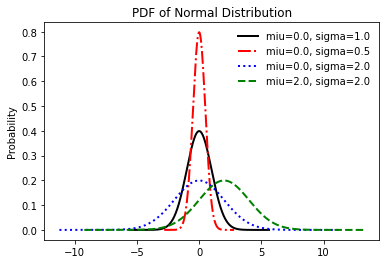

In [89]:
"""
不同参数下的指数分布
"""
dis_param = numpy.dtype([('miu','f4'), ('sigma', 'f4'), 
                         ('line_sytle', numpy.str_, 2), 
                         ('line_color', numpy.str_, 2)]) 
dis_params = numpy.array([
    (0, 1, '-', 'k'),
    (0, 0.5, "-.", 'r'),
    (0, 2, ':', 'b'),
    (2, 2, '--', 'g')], dtype=dis_param
) 
fig, ax = plt.subplots(1, 1)
with numpy.nditer(dis_params) as it:
    for i in it:
        miu = i['miu']
        sigma = i['sigma']
        norm_dis = stats.norm(miu, sigma)
        x = numpy.linspace(norm_dis.ppf(1e-8),
                           norm_dis.ppf(0.99999999),
                           1000)
        l = str(i['line_sytle'])
        color = str(i['line_color'])
        ax.plot(x, norm_dis.pdf(x), ls=l, c=color,
                 lw=2, label = r'miu={}, sigma={}'.format(miu, sigma))
plt.ylabel('Probability')
plt.title(r'PDF of Normal Distribution')
ax.legend(loc='best', frameon=False)
plt.show()


### 指数分布与泊松分布的关系

先总体上比较一下这两个分布：

* 在泊松分布中，时间是固定的(例如单位时间内)，研究的随机变量𝑋是某事件在该时间段内出现的次数。其均值为 𝜆，表示某随机事件在单位时间内平均发生的次数；
* 在指数分布中，出现的次数是固定的（比如出现了1次），研究的是随机变量 𝑇出现（发生，或到达）1次需要的时间。其均值为 1/𝜆，表示某随机事件发生一次的平均时间间隔。
* 𝜆越大，表示单位时间里发生的次数就越多，那么每两次事件之间的时间间隔1/𝜆也就越小。

已知泊松分布在时间𝑡上的PMF为（此时可以将𝑡看做是一个固定的常数）：
$${P_X(k)=\begin{cases}
\frac{e^{-\lambda t}({\lambda t}^k)}{k!} & \text{ if } k\in R_X \\ 
0 & \text{ otherwise } 
\end{cases}}$$

泊松过程中，第k次随机事件与第k+1次随机事件出现的时间间隔服从指数分布。而根据泊松过程的定义，我们定义 𝑇 为两次随机事件出现的时间间隔。此时 𝑇 是一个随机变量，并且可以得到 𝑇 的分布函数为：
$${F(t)=Pr(T\leq t)}$$

上式就等于，
$${F(t)=Pr(T\leq t)=1-Pr(T>t)}$$

在长度为 t 的时间段内没有随机事件出现的概率，即时间间隔大于𝑡，（下面的式子是理解泊松分布与指数分布之间关系的关键！）：
$${Pr(T>t)=Pr(随机事件在时间𝑡内出现了0次)=Pr(X=0)=\frac{e^{-\lambda t}({\lambda t}^0)}{0!}=e^{-{\lambda}t}}$$

将上式带入 (3) 式就可以得到：$${𝐹(𝑡)=1−𝑒^{−𝜆𝑡}}$$

这个式子就是指数分布的累积分布函数，对其求导后，就可以得到指数分布的概率密度函数，同定义中给出的形式。

 


举一个例子来更好的理解指数分布和泊松分布之间的关系：一座休眠的火山平均100年会有一次喷发，那么如何来求火山下一次喷发的时间概率？ 
根据题意将100年作为一个单位时间，那么 𝜆=1等效于单位时间50年内的一次喷发。 那么根据上式就可以计算出小于某个特定时间点，火山可能会喷发的概率。 以下是解决该问题的代码：




[0.         0.04877058 0.09516258 0.13929202 0.18126925 0.22119922
 0.25918178 0.29531191 0.32967995 0.36237185 0.39346934 0.42305019
 0.45118836 0.47795422 0.5034147  0.52763345 0.55067104 0.57258507
 0.59343034 0.61325898]
[0.         0.00995017 0.01980133 0.02955447 0.03921056 0.04877058
 0.05823547 0.06760618 0.07688365 0.08606881 0.09516258 0.10416586
 0.11307956 0.12190457 0.13064176 0.13929202 0.14785621 0.15633518
 0.16472979 0.17304087]
[0.         0.22119922 0.39346934 0.52763345 0.63212056 0.7134952
 0.77686984 0.82622606 0.86466472 0.89460078 0.917915   0.93607214
 0.95021293 0.96122579 0.96980262 0.97648225 0.98168436 0.98573577
 0.988891   0.9913483 ]


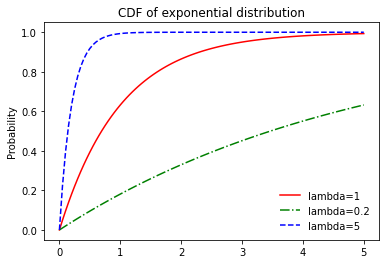

In [117]:
"""
本例说明泊松分部和指数分布的关系,
满足泊松分布的随机事件,在单位事件内发生
的概率等于下式
  - P(Xt <= x) = 1 - e^(-lambda * x)
该式就是指数分布的概率密度函数
"""
x = numpy.linspace(stats.poisson.ppf(0.001, 1),
                   stats.poisson.ppf(0.999, 1),101)

y1 = 1 - numpy.power(numpy.e, -x)      # lambda = 1
y2 = 1 - numpy.power(numpy.e, -0.2*x)  # lambda = 0.2
y3 = 1 - numpy.power(numpy.e, -5*x)    # lambda = 1.5
print(y1[:20])
print(y2[:20])
print(y3[:20])
fig, ax = plt.subplots(1, 1)
ax.plot(x, y1, 'r-', label='lambda=1')
ax.plot(x, y2, 'g-.', label='lambda=0.2')
ax.plot(x, y3, 'b--', label='lambda=5')
ax.legend(loc='best', frameon=False)
plt.ylabel('Probability')
plt.title('CDF of exponential distribution')
plt.show()


代码运行结果可以这样理解，如果每100年内喷发的次数越多（𝜆越大），那么下一次发生喷发的时间间隔就有可能越短。例如我们取时间为2， 表示第200年，则会预期在200年内火山喷发的概率：

    蓝色线的概率取值几乎为1 ，表示如果100年内平均会喷发5次的情况下，250年内几乎肯定会发生至少喷发一次；
    绿色线的概率大概为0.4，表示如果100年内平均喷发0.2次，也就是说基本上500年才喷发一次，那么250年内喷发的概率就会比较小。


## 随机变量的数字特征

如果说一个随机变量的分布函数（累计分布或概率密度分布）是对该随机变量最完整，最具体的描述，那么随机变量的数字特征就是对该随机变量的部分特征的描述。分布函数就像是一个人的全身像，而数字特征就像是一个人的局部特写。

 

 
### 为什么要研究随机变量的数字特征

很多情况下，可能由于数据不完整或是采集数据的代价过高，我们只能得到一个随机变量的部分信息而无法得到具体的分布函数。这个时候，我们可以根据有限的数据，利用该随机变量的某些数字特征对其进行局部的研究。这样的研究，虽然无法从根本上解决数据有限的问题，但还是可以让我们对所研究的随机变量有一个概括的认识，了解它的一些基本性质。最常见的数字特征只要包括以下几种：

* 数学期望
* 方差
* 矩
* 协方差和相关系数

前面三个数字特征都是单个随机变量自身的特征，第四个数字特征则用来表示两个随机变量之间的关系。

### 数学期望（Mathematical Expectation）

一个随机变量𝑋的数学期望，简称期望，记为𝐸(𝑋)。常见随机变量的定义中，都直接或间接包含了“期望”这个参数，该参数一般与分布在坐标轴上的位置有关。期望体现的是随机变量中的“大多数”的取值情况或趋势。

在计算时，随机变量𝑋的期望值𝐸(𝑋)并不等同于一个具体样本集𝑥的均值𝐸(𝑥) —— 一个具体样本集的均值是将所有的值求和然后除以样本个数。因为此时的𝑥已经是一个具体的数列，而不再具有随机性 —— 随机变量𝑋的期望值是加权平均数。

例如，一个离散型随机变量𝑋的概率质量分布列如下：

|x|0|1|2|3|4|
|:---|:---|:---|:---|:---|:---|
|P(X=x)|.15|.30|.25|.20|.10|

那么根据定义，${𝐸(𝑋)=\sum_{𝑖=1}{𝑛}𝑥_𝑖𝑝_𝑖=0×0.15+1×0.3+2×0.25+3×0.2+4×0.1=1.8}$；
如果我们从该随机变量中取1个样本集${𝑥_1=1,1,2,4,4}$，那么${𝐸(𝑥_1)=\frac{1+1+2+4+4}{5}=2.4}$。

此外，正式定义中对期望存在与否给出了明确的判断。在求离散型随机变量的期望时，需要其和式构成的级数是收敛的；在连续型随机变量期望的定义中，也有类似的要求。一个典型的例外，连续型随机变量柯西分布因为不满足此条件，因此不具有均值，具体解释可以参考 Comparing the Cauchy and Gaussian (Normal) density functions 和 Why does the Cauchy distribution have no mean?.

**期望的起源**

期望这个名字听起来，并不是那么直白。但是如果知道这个名字的起源，那么就会觉得这个名字是名副其实的。
早在17世纪，有一个赌徒向法国著名数d家帕斯卡挑战，给他出了一道题目：甲乙两个人赌博，他们两获胜的机率相等，比赛规则是先胜三局者为赢家，赢家可以获得100法郎的奖励。录比赛进行到第三局的时候，甲胜了两局，乙胜了一局，这时由于某些原因中止了比赛，那么如何分配这100法郎才比较公平？用概率论的知识，不难得知，甲获胜的概率为1/2+(1/2)*(1/2)=3/4，或者分析乙获胜的概率为(1/2)*(1/2)=1/4。因此由此引出了甲的期望所得值为100*3/4=75法郎，乙的期望所得值为25法郎。这个故事里出现了“期望”这个词，数学期望由此而来。

**数学期望的性质**

* 设𝑐是常数，则有𝐸(𝑐)=𝑐；

* 设𝑋是一个随机变量，c是常数，则有𝐸(𝑐𝑋)=𝑐𝐸(𝑋)；

* 设𝑋, 𝑌是两个随机变量，则有𝐸(𝑋+𝑌)=𝐸(𝑋)+𝐸(𝑌)；

将上面三点结合起来，则有𝐸(𝑎𝑋+𝑏𝑌+𝑐)=𝑎𝐸(𝑋)+𝑏𝐸(𝑌)+𝑐，可以推广到任意有限个随机变量线性组合的情况；

* 设𝑋, 𝑌是相互独立的两个随机变量，则有𝐸(𝑋𝑌)=𝐸(𝑋)𝐸(𝑌)，可以推广到任意有限个相互独立的随机变量之积的情况。

 
**常见分布的期望**

下面这些分布的期望指的是随机变量的期望，而不是某个随机变量抽样得到的样本集的期望。在离散型随机变量中，数学期望的物理意义是“一维离散质点系的重心坐标”；在连续型随机变量中，数学期望的物理意义是“一维连续质点系的重心坐标”，

* 0-1分布，X∼B(1,p)，则E(X)=p；
* 二项分布，X∼B(n,p)，则E(X)=np；
* 泊松分布，X∼P(λ)，则E(X)=λ；
* 几何分布，X∼G(p)，则E(X)=1/p；
* 均匀分布，X∼U[a,b]，则E(X)=(a+b)/2；
* 正态分布，X∼N(μ,σ2)，则E(X)=μ；
* 指数分布，X∼E(λ)，则E(X)=1/λ；
 
**样本均值的计算**

在实际的应用中，我们一般都是已知某个分布的一组样本，需要求这组样本的均值。在计算时，定义中的平均值是算术平均值；还有一种计算平均值的方法是几何平均值，即所有样本值相乘后开N次方，N为样本数。

算术平均值和几何平均值最大的区别在于：如果样本中有0存在，几何平均值就等于0；如果样本中不包括0，通常算术平均值 ≥ 几何平均值。下面是Python实现的方法：

In [30]:
## 计算平均值
x = numpy.arange(1, 11)
print(x)  # [ 1  2  3  4  5  6  7  8  9 10]
mean = numpy.mean(x)
print(mean)  # 5.5

# 对空值的处理，nan stands for 'Not-A-Number'
x_with_nan = numpy.hstack((x, numpy.nan))
print(x_with_nan)  # [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  nan]
mean2 = numpy.mean(x_with_nan)
print(mean2)  # nan，直接计算没有结果
mean3 = numpy.nanmean(x_with_nan)
print(mean3)  # 5.5

## 计算几何平均值
x2 = numpy.arange(1, 11)
print(x2)  # [ 1  2  3  4  5  6  7  8  9 10]
geometric_mean = stats.gmean(x2)
print(geometric_mean)  # 4.52872868812，几何平均值小于等于算数平均值

[ 1  2  3  4  5  6  7  8  9 10]
5.5
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. nan]
nan
5.5
[ 1  2  3  4  5  6  7  8  9 10]
4.5287286881167645


### 方差（Variance）

一个随机变量𝑋的方差，刻画了𝑋取值的波动性，是衡量该随机变量取值分散程度的数字特征。方差越大，就表示该随机变量越分散；方差越小，就表示该随机变量越集中。在实际应用中，例如常见的关于“射击”的例子中，如果一个运动员打靶得分的方差大，就表示该运动员打在靶上的位置比较分散，成绩不稳定；相反则表示打在靶上的位置比较集中，成绩稳定。

**方差的性质**

* 设𝑐是常数，则有𝐷(𝑐)=0；

* 设𝑋是一个随机变量，c是常数，则有${𝐷(𝑐𝑋)=𝑐^2𝐷(𝑋)}$；
     特例，𝐷(−𝑋)=𝐷(𝑋)

* 设𝑋, 𝑌是两个随机变量，则有${𝐷(𝑋+𝑌)=𝐷(𝑋)+𝐷(𝑌)+2⋅𝑡𝑎𝑖𝑙}$，其中，${𝑡𝑎𝑖𝑙=𝐸[𝑋−𝐸(𝑋)][𝑌−𝐸(𝑌)]}$。 特别，若𝑋, 𝑌相互独立，则有${𝐷(𝑋+𝑌)=𝐷(𝑋)+𝐷(𝑌)}$；

将上面三点结合起来，设𝑋, 𝑌相互独立，a, b, c是常数，则有${𝐷(𝑎𝑋+𝑏𝑌+𝑐)=𝑎^2𝐷(𝑋)+𝑏^2𝐷(𝑌)}$，可以推广到任意有限个独立随机变量线性组合的情况；

* ${𝐷(𝑋)=0<=>𝑃(𝑋=𝑐)=1，且𝑐=𝐸(𝑋)}$；

* 当𝑋, 𝑌相互独立时，${D(XY)=D(X)D(Y)+D(X)[E(Y)]^2+D(Y)[E(X)]^2}$。还有一个常用的计算方差的公式：${𝐷(𝑋)=𝐸(𝑋^2)−[𝐸(𝑋)]^2}$

 
2.2 常见分布的方差


* 0-1分布，${X\sim B(1,p)}$，则${D(X)=p(1-p)}$ 
* 二项分布， ${X\sim B(n,p)}$，则${D(X)=np(1-p)}$
* 泊松分布， ${X\sim P(𝜆)}$，则${D(X)=𝜆,(𝜆>0)}$，与𝐸(𝑋)相同
* 几何分布，${X\sim G(p)}$，则${D(X)=(1−p)/p^2}$
* 均匀分布，${X\sim U[a,b]}$，则${D(X)=(b−a)2/12}$
* 正态分布，${X\sim N(𝜇,𝜎^2)}$，则${D(X)=𝜎^2,(𝜎>0)}$
* 指数分布，${X\sim E(𝜆)}$，则${D(X)=1/𝜆^2,(𝜆>0)}$，𝐸(𝑋)的平方


*关于中心距和方差的关系需要补充说明    

In [ ]:
import numpy as np

# 参考
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html


data = np.arange(7, 14)
print(data)  # [ 7  8  9 10 11 12 13]

## 计算方差
# 直接使用样本二阶中心距计算方差，分母为n
var_n = np.var(data)  # 默认，ddof=0
print(var_n) # 4.0
# 使用总体方差的无偏估计计算方差，分母为n-1
var_n_1 = np.var(data, ddof=1)  # 使用ddof设置自由度的偏移量
print(var_n_1) # 4.67


## 计算标准差
std_n = np.std(data, ddof=0)
std_n_minus_1 = np.std(data, ddof=1)  # 使用ddof设置自由度的偏移量
print(std_n, std_n_minus_1)  # 2.0, 2.16
print(std_n**2, std_n_minus_1**2)  # 4.0, 4.67

### 矩


矩是一个非常广泛的概念，期望和方差都是矩的特例。

定义：若${E(X^k),k=1,2,...}$存在，则称${E(X^k)}$为𝑋的k阶原点矩，记为${a_k=E(X^k)}$；若${E[X-E(X)]^k,k=1,2,...}$存在，则称${E[X−E(X)]^k}$为𝑋的k阶中心距，记为${\beta_k=E[X-E(X)]^k]^𝑘}$

根据定义，期望𝐸(𝑋)是1阶原点矩，方差𝐷(𝑋)是2阶中心距。需要注意的是，就像上面提到过的，样本的2阶中心矩并不是总体方差的无偏估计，样本方差𝑆2的实际计算公式中分母为𝑛−1，而不是样本2阶中心距中的𝑛。

符号说明：没有查到专门表示矩的符号（就像用𝜇表示总体均值那样），参考的几个地方用的符号也不一致。 但是一般都用小写希腊字母表示总体矩，用大写字母表示样本矩。我就在这里约定一下，后面都统一使用以下符号。

    总体k阶原点矩：𝛼𝑘；
    总体k阶中心矩：𝛽𝑘；
    样本k阶原点矩：𝐴𝑘；
    样本k阶中心矩：𝐵𝑘.



### 协方差和相关系数

上面几种随机变量的数字特征都是描述单个随机变量局部性质的量，协方差和相关系数则是用来度量两个不同的随机变量之间的相关程度。

 
4.1 协方差

如上面介绍方差的性质时，第(3)条提到的那样：设𝑋, 𝑌是两个随机变量，则有${𝐷(𝑋+𝑌)=𝐷(𝑋)+𝐷(𝑌)+2⋅𝑡𝑎𝑖𝑙}$，其中，${𝑡𝑎𝑖𝑙=𝐸[𝑋−𝐸(𝑋)][𝑌−𝐸(𝑌)]}$。 特别，若𝑋, 𝑌相互独立，则有${𝐷(𝑋+𝑌)=𝐷(𝑋)+𝐷(𝑌)}$； 若𝑋, 𝑌相互独立，tail就等于0，那么tail不等于0时，就表示𝑋, 𝑌这两个随机变量不相互独立。tail就是𝑋与𝑌的协方差。

 
定义：数值${𝐸[𝑋−𝐸(𝑋)][𝑌−𝐸(𝑌)]}$为随机变量𝑋与𝑌的协方差，记为𝐶𝑜𝑣(𝑋,𝑌)，即${𝐶𝑜𝑣(𝑋,𝑌)=𝐸[𝑋−𝐸(𝑋)][𝑌−𝐸(𝑌)]}$
此时，${𝐷(𝑋+𝑌)=𝐷(𝑋)+𝐷(𝑌)+2𝐶𝑜𝑣(𝑋,𝑌)}$，协方差 𝐶𝑜𝑣(𝑋,𝑌) 反映了随机变量𝑋与𝑌的线性相关性：

    当𝐶𝑜𝑣(𝑋,𝑌)>0时，称𝑋与𝑌正相关；
    当𝐶𝑜𝑣(𝑋,𝑌)<0时，称𝑋与𝑌负相关；
    当𝐶𝑜𝑣(𝑋,𝑌)=0时，称𝑋与𝑌不相关；

协方差的计算公式可以化简为：${𝐶𝑜𝑣(𝑋,𝑌)=𝐸(𝑋𝑌)−𝐸(𝑋)𝐸(𝑌)}$
注：两个随机变量相互独立或不相关时，协方差为0；但是两个随机变量的协方差等于0的时候，不一定相互独立（只能说明没有线性相关性）。

 
4.2 相关系数

协方差是有量纲的数字特征，为了消除其量纲的影响，引入了相关系数。在平时的数据分析中，协方差很少出现，相关系数出现的频率非常高。

定义：数值 
$${{\rho }_{XY} = \frac{Cov(X,Y)}{\sqrt {D(X)D(Y)}}}$$
称为随机变量𝑋与𝑌的相关系数。

相关系数的性质

    |𝜌𝑋𝑌|≤1（相关系数的值位于区间[−1,1]）；
    |𝜌𝑋𝑌|=1 <=> 存在常数a, b，使得𝑃(𝑌=𝑎+𝑏𝑋)=1. 特别的，𝜌𝑋𝑌=1时，𝑏>0; 𝜌𝑋𝑌=−1时，𝑏<0

与协方差相同，相关系数也是用来表征两个随机变量之间线性关系密切程度的特征数，有时也称为“线性相关系数”。


### 样本均值的期望和方差

设随机变量𝑋的一组样本为𝑥，则样本的均值${\bar{x}=\frac{1}{n}\sum_{i=1}^{n}{x_i}}$。此时的样本𝑥与样本均值${\bar{x}}$都是确定的数值，不具有随机性。但是，如果我们取了很多组样本：𝑥(1),𝑥(2),...，那么这些样本的均值${\bar{𝑥}(1), \bar{𝑥}(2),...}$就可以组成一个新的随机变量，可以记为${\bar X}$，每一个样本均值也可以看做是从该随机变量中抽样所得。

样本均值${\bar{𝑋}}$这个随机变量是随机变量𝑋的函数。根据期望和方差的定义，我们可以求出样本均值的期望和方差。

假设随机变量𝑋的期望和方差分别为：${𝜇和𝜎^2}$

${𝐸(\bar{𝑋})=𝜇}$，样本均值的期望与原随机变量的期望相同；

${𝐷(\bar{𝑋})=\frac{𝜎^2}{𝑛}}$，其中n为每次取样的样本量；样本组数在这里并没有体现。这是因为${\bar{X}}$的随机性是在获取单组样本时体现出来的（即结果的不确定性），跟组数无关（当每组样本获得之后，数据就不再具有随机性了）。由此可见，每次采样的样本量越多，得到的样本均值的方差也越小也就表示更加准确，但是取样所用的时间和成本也同时增加了。这就需要在准确性和成本之间有一个权衡。

下面用程序做一个测试，测试的是样本均值的标准差随着样本量的变化而发生的变化，如果样本缩小𝑛倍，那么理论上标准差会缩小${\sqrt{𝑛}}$倍。

In [32]:
def mean_and_std_of_sample_mean(ss=[], group_n=100):
    """
    不同大小样本均值的均值以及标准差
    """
    norm_dis = stats.norm(0, 2)  # 定义一个均值为0，标准差为2的正态分布
    for n in ss:
        sample_mean = []  # 收集每次取样的样本均值
        for i in range(group_n):
            sample = norm_dis.rvs(n)  # 取样本量为n的样本
            sample_mean.append(numpy.mean(sample))  # 计算该组样本的均值
        print(numpy.std(sample_mean), numpy.mean(sample_mean))

sample_size = [1, 4, 9, 16, 100]  # 每组试验的样本量
group_num = 10000
mean_and_std_of_sample_mean(ss=sample_size, group_n=group_num)

2.00456457133971 -0.009871164326340144
1.0126502691264254 -0.004144606297152466
0.663569230709121 0.0005997846662290847
0.49913912211405 -0.001563784961930281
0.19778201210142668 -0.0004416965907853731


上面的测试中，从一个均值为0，标准差为2的正态分布中抽样。便于理解，可以将样本组数看做是参与试验的人数，这里固定为10000；可以将不同的样本量看做是每个人做实验时需要遵守的试验条件，这里的试验条件分别为1, 4, 9, 16, 100，即每次从总体中抽样的个数。整个试验流程是：1万个人都参与了5次不同试验条件的试验，每次做完试验每个人先计算自己所得样本集的均值，然后汇总1万个人的结果计算这10000个值的标准差和均值。

参考上面的输出结果：

第一次试验，每个人从总体中抽取1个样本，标准差近似等于2（只存在少量误差）；

第二次试验，每个人从总体中抽取4个样本，标准差近似等于1，减少了${\sqrt{4}}$倍，与理论值相同；

第三次试验，每个人从总体中抽取9个样本，标准差近似等于2/3，减少了${\sqrt{9}}$倍，与理论值相同；

第四次试验，每个人从总体中抽取16个样本，标准差近似等于1/2，减少了${\sqrt{16}}$倍，与理论值相同；

第五次试验，每个人从总体中抽取100个样本，标准差近似等于1/5，减少了${\sqrt{100}}$倍，与理论值相同。

改变组数，即参与试验的人数，对试验结果影响不大。具体的证明过程，可参考Mean and Variance of Sample Mean

## 数理统计

### 统计学中的基本概念

如果说概率论中主要是研究随机变量的方法学和理论模型，那么统计学就是利用概率论这一强大的工具来研究具有随机性的现象（结果的不确定性）。而研究这些随机现象最重要的方法就是，大量重复试验进而找到其统计规律性。一般步骤为：重复试验（例如反复测量，多次观察等）并记录试验结果，然后对这些实验数据进行整理、分析和建模。最终达到对随机现象的某些规律进行预测并指导我们的决策的目的。下面对一些基本概念做一个总结。


#### 率论与数理统计的异同
-----------------------------------------------

概率论、数理统计都是研究随机现象的统计规律性的数学分支，但两者研究角度不同。

    概率论：从已知分布出发，研究随机变量𝑋的性质、规律、数学特征等；
    数理统计：研究对象𝑋的分布未知或只知道部分信息，需要观察它的取值（数据采集），通过分析数据来推断𝑋服从什么分布或确定未知参数。

数理统计研究问题的主要方法：以部分数据信息来推断整体相关信息 


#### 样本与总体
---------------------------------------------

样本与总体的概念，在前面已经多次接触到，只是没有非常明确的给出定义。例如我们一般假设某个学校全体学生的身高，用随机变量𝑋表示，近似服从正态分布，这里的正态分布就是"总体"的分布，字面意思就是所有待研究对象的集合。在实际的数据分析中，我们通过观察或其他测量方式得到的数据一般都只是待研究对象的一个子集，这个子集就是一个样本（可以包含多个个体）。例如通过某种方式，从全体学生中找出100名学生，这100名学生就是一个样本。样本与总有之间的关系，有两种可能的情况：

    如果这种方式是完全随机的（例如抽签），那么这个样本就是全体学生的一个非常好的代表，我们可以利用这个100个学生的平均身高、体重、家庭收入等来估计全体学生的平均身高、体重以及家庭收入。这时候样本的分布应该与总体的分布类似，都近似服从正态分布。
    但如果我们找出这100名学生的方式不是完全随机的，那么这个样本就不具有代表性，此时样本的分布与总体的分布可能会有非常大的差异。

**总体：** 研究对象的全体；

**个体：** 总体中的成员；

**总体的容量：** 总体中包含的个体数；

**有限总体：** 容量有限的总体；

**无限总体：** 容量无限的总体，通常将容量非常大的有限总体也按无限总体处理。

**样本，总体&随机变量**

* 实际中人民通常只关注总体的某个（或几个）指标；
* 总体的某个指标𝑋，例如全体学生的身高，对于不同的个体来说有不同的取值，这些取值构成一个分布，因此𝑋可以看成一个随机变量；有时候直接将𝑋称为总体，假设𝑋的分布函数为𝐹(𝑥)，也称总体𝑋具有分布𝐹(𝑥)。

**样本容量：** 样本中所含个体的数目；

**抽样：** 抽取样本的过程；

    由于抽样的随机性，样本也具有随机性，通常容量为n的样本用随机变量 𝑋1,...,𝑋𝑛来表示，

**简单随机样本：** 若${𝑋_1,𝑋_2,...,𝑋_𝑛}$是相互独立的（独立性）且与总体𝑋有相同的分布（代表性），则称${𝑋_1,𝑋_2,...,𝑋_𝑛}$为来自总体 𝑋 的一个容量为n的简单随机样本，简称为𝑋的一个样本。获得简单随机样本的抽样称为简单随机抽样。如果没有特殊说明，统计里面所说的样本都指的是简单随机样本。

样本${𝑋_1,𝑋_2,...,𝑋_𝑛}$的每一个观察值${x_1,x_2,...,x_𝑛}$称为样本值或样本的一次实现。

**样本空间：** 样本值的集合称为。

总体分布决定了样本取值的概率规律，因而可以由样本值去推断总体。数理统计的主要任务之一就是研究如何根据样本推断总体。

 
**联合分布函数：** 若总体 𝑋的分布函数为${𝐹(𝑥)，𝑋_1,𝑋_2,...,𝑋_𝑛}$ 为来自𝑋的一个样本，则样本${𝑋_1,𝑋_2,...,𝑋_𝑛}$的联合分布函数为：
$${F(x_1,x_2,...,x_n)=\prod_{i=1}^{n}F(x_i)}$$

#### 统计量
------------------

统计量的概念存在于样本中，是对样本某个指标的概括，例如上面例子中选出来的100位学生的平均身高就是一个统计量。统计量区别于"个体量"（我自己生造的词），具有以下两个特点：

* 不包含任何未知数；
* 包含所有样本的信息。

因此只要样本确定，统计量的值就可以直接计算出来。例如一旦选定100位学生，他们的平均身高就可以计算出来。
 

**定义**

样本的不包含任何未知参数的函数。通常可以通过构造统计量的方式，从样本中提取有用的信息来研究总体的分布以及各种特征数。

**常用统计量**

* 样本均值 ${\bar{x}=\frac{1}{𝑛} \sum_{i=1}^{n} 𝑋_𝑖}$；
* 样本方差 ${𝑆^2=\frac{1}{𝑛−1}\sum_{i=i}^{n}(X_i-\bar{X})^2}$；
* 样本标准差 ${𝑆=\sqrt{𝑆^2}}$；
* 样本k阶原点矩 ${𝐴_𝑘 = \frac{1}{𝑛}\sum_{𝑖=1}^{𝑛}𝑋_{i}^{𝑘}}$；
* 样本k阶中心距 ${𝐵_𝑘 = \frac{1}{𝑛}\sum_{i=1}^{𝑛}(𝑋_𝑖−\bar{𝑋})^𝑘, k = 1, 2, ...}$

从上面可以看到：样本的均值等于样本的1阶原点矩；但是样本的方差不等于样本的2阶中心距（在总体中这两者是相等的）；

**用统计量估计总体的数字特征**

当总体数字特征未知时，

* 用样本均值${\bar{𝑋}}$估计总体均值𝜇=𝐸(𝑋)；
* 用样本方差${𝑆^2}$估计总体方差${𝜎^2=𝐸(𝑋−𝜇)^2}$；
* 用样本原点矩${𝐴_𝑘}$估计总体原点矩${𝛼_𝑘=𝐸(𝑋_𝑘)}$；
* 用样本中心距${𝐵_𝑘}$估计总体中心距${𝛽_𝑘=𝐸(𝑋−𝜇)^𝑘}$。

上面用到的表示矩的符号，请参考小结5中，矩那部分的符号说明。

以上估计的理论基础就是大数定律。值得注意的是，总体的均值𝜇是一个数，可能已知，也可能未知；而样本均值${\bar{𝑋}}是一个随机变量，依赖于样本值。




 

#### 数定理与中心极限定理

这两个定理可以说是概率论中最重要的两个定理。也是由于中心极限定理的存在，使得正态分布从其他众多分布中脱颖而出，成为应用最为广泛的分布。这两个定理在概率论的历史上非常重要，因此对于它们的研究也横跨了几个世纪（始于18世纪初），众多耳熟能详的大数学家都对这两个定理有自己的贡献。因此，这两个定理都不是单一的定理。不同的大数定理和中心极限定理从不同的方面对相同的问题进行了阐述，它们条件各不相同，得到的结论的强弱程度也不一样。


### 大数定理（law of large numbers，LLN）
大数定律可以说是整个数理统计学的一块基石，最早的大数定律由伯努利在他的著作《推测术》中提出并给出了证明。这本书出版于伯努利去世后的1713年。数理统计学中包含两类重要的问题——对概率p的检验与估计。大数定律的本质是一类极限定理，它是由概率的统计定义“频率收敛于概率”引申而来的。简单来说就是n个独立同分布的随机变量的观察值的均值${\bar{𝑋}}$依概率收敛于这些随机变量所属分布的理论均值，也就是总体均值。

举一个古典概率模型的例子：拿一个盒子，里面装有大小、质地一样的球a+b个，其中白球a个，黑球b个。这时随机地从盒子中抽出一球(意指各球有同等可能被抽出)，则“抽出的球为白球”这一事件A的概率${p=a/(a+b)}$。但是如果不知道a、b的比值，则p也不知道。但我们可以反复从此盒子中抽球(每次抽出记下其颜色后再放回盒子中)。设抽了N次，发现白球出现了m次，则用m/N去估计p。这个估计含有其程度不确定的误差，但我们直观上会觉得，抽取次数N越大，误差一般会缩小。

从实用的角度看，概率的统计定义无非是一种通过实验去估计事件概率的方法。大数定律为这种后验地认识世界的方式提供了坚实的理论基础。正如伯努利在结束《推测术》时就其结果的意义作的表述：“如果我们能把一切事件永恒地观察下去，则我们终将发现：世间的一切事物都受到因果律的支配，而我们也注定会在种种极其纷纭杂乱的现象中认识到某种必然。”

1.1 定义

设${𝑋_1, 𝑋_2,...,𝑋_𝑛}$是独立同分布的随机变量，记它们的公共均值为𝜇。又设它们的方差存在并记为${𝜎^2}$。则对任意给定的${𝜀>0}$，有
$${\lim_{n\rightarrow \infty }P(\left | \bar{X}_n-\mu \right | \geq \varepsilon )=0}$$

这个式子指出了“当n很大时，${\bar{𝑋}_n}$接近𝜇”的确切含义。这里的“接近”是概率上的，也就是说虽然概率非常小，但还是有一定的概率出现意外情
况（例如上面的式子中概率大于𝜀）。只是这样的可能性越来越小，这样的收敛性，在概率论中叫做“${\bar{𝑋}_n}$依概率收敛于𝜇”。


Python模拟抛硬币

下面用程序模拟抛硬币的过程来辅助说明大数定律：

用random模块生成区间[0,1)之间的随机数，如果生成的数小于0.5，就记为硬币正面朝上，否则记为硬币反面朝上。由于random.random()生成的数可以看做是服从区间[0,1)上的均匀分布，所以以0.5为界限，随机生成的数中大于0.5或小于0.5的概率应该是相同的(相当于硬币是均匀的)。这样就用随机数模拟出了实际的抛硬币试验。理论上试验次数越多(即抛硬币的次数越多)，正反面出现的次数之比越接近于1(也就是说正反面各占一半).

 

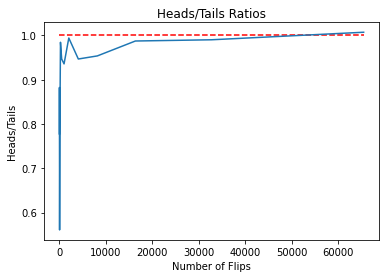

In [33]:
import random

def flip_plot(minExp, maxExp):
    """
    模拟抛硬币
    共做了(2**maxExp - 2**minExp)批次实验，每批次重复抛硬币2**n次
    
    入参
    ____
    minExp: int
        第一次试验抛硬币的次数为2**minExp
    maxExp: int
        最后一次试验抛硬币的次数为2**maxExp
        
    返回值
    ______
        无
    """
    
    ratios = []
    xAxis = []                  # 存储每次试验抛的次数   
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0            # 硬币正面朝上的计数
        for n in range(numFlips):
            if random.random() < 0.5: 
                numHeads += 1
        numTails = numFlips - numHeads
        ratios.append(numHeads/float(numTails))

    plt.title('Heads/Tails Ratios')
    plt.xlabel('Number of Flips')
    plt.ylabel('Heads/Tails')
    plt.plot(xAxis, ratios)
    plt.hlines(1, 0, xAxis[-1], linestyles='dashed', colors='r')
    plt.show()

flip_plot(4, 16)

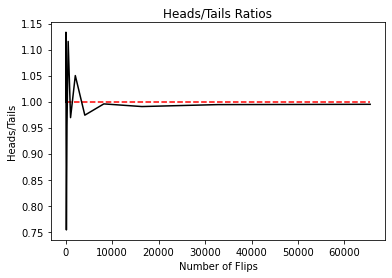

In [120]:
def flip_plot2(minExp, maxExp):
    """
    模拟抛硬币
    共做了(2**maxExp - 2**minExp)批次实验，每批次重复抛硬币2**n次
    
    入参
    ____
    minExp: int
        第一次试验抛硬币的次数为2**minExp
    maxExp: int
        最后一次试验抛硬币的次数为2**maxExp
        
    返回值
    ______
        无
    """
    flip_num = numpy.arange(minExp, maxExp+1) 
    stats = numpy.array([numpy.exp2(flip_num),
                         numpy.zeros(flip_num.size)])
    
    with numpy.nditer(stats, flags =  ['external_loop'], op_flags=['readwrite'], order =  'F') as it:
        for x in it:
            head = (numpy.random.random(int(x[0])) < 0.5)
            headCount = numpy.sum(head)
            x[1] = headCount/(x[0] - headCount)
                
    plt.title('Heads/Tails Ratios')
    plt.xlabel('Number of Flips')
    plt.ylabel('Heads/Tails')
    plt.plot(stats[0], stats[1], 'k')
    plt.hlines(1, 0, stats[0][-1], linestyles='dashed', colors='r')
    plt.show()
    
flip_plot2(4, 16)

### 中心极限定理（central limit theorem，CLT）


与大数定理描述某个值的收敛趋势不同，中心极限定理描述的是某种形式的随机变量之和的分布。
 
2.1 从大数定理到中心极限定理
2.1.1 对于这两个定理之间的联系与区别，知乎上的Detian Deng有如下回答：

    简单来说，大数定律（LLN）和中心极限定理（CLT）的联系与区别在于：

    共同点：都是用来描述独立同分布（i.i.d）的随机变量的和的渐进表现（asymptotic behavior)
    区别：首先，它们描述的是在不同的收敛速率（convergence rate）之下的表现，其次LLN前提条件弱一点：𝐸(|𝑋|)<∞, CLT成立条件强一点：𝐸(𝑋^2)<∞
    
上面的描述中，${𝐸(𝑋^2)<∞}$ 相当于表示随机变量𝑋的二阶原点矩存在，即方差存在；${𝐸(|𝑋|)<∞}$表示𝑋的一阶原点矩存在，即期望存在。方差存在可以推出期望存在，但是反之则不行。

利用大数定理我们可以用样本均值估计总体分布的均值。例如抛硬币，假如我们有一枚不均匀的硬币，事先并不知道正面朝上的概率${𝑃_ℎ}$。那么我们
可以大量重复抛这枚硬币，统计正面朝上的次数，用这个值除以抛硬币的总次数，就可以近似的得到一个比值，例如${𝑃_1}。
这个值就是对${𝑃_ℎ}$的估计，根据大数定理，我们可以保证抛硬币的总次数越多这个估计的误差就越小（即${𝑃_1}$依概率收敛于${𝑃_ℎ}$）。
对于大数定理，故事到这里就结束了。

此时，如果我们将每次抛硬币都看成是一次伯努利试验，即${𝑋∼𝐵(1,𝑃_ℎ)}$，其中正面朝上记为1，概率为${𝑃_ℎ}$。由于是同一个人进行的试验，可以将每次试验都看作是独立同分布。对于充分大的n，根据中心极限定理可得：
$${𝑋_1+𝑋_2+⋯+𝑋_𝑛∼𝑁(𝑛𝑃_ℎ,𝑛𝑃_ℎ(1−𝑃_ℎ))}$$
上式表示所有试验结果之和，也就是硬币正面朝上的总次数，服从均值为${𝑛𝑃_ℎ}$，方差为${𝑛𝑃_ℎ(1−𝑃_ℎ)}$的正态分布。这里的分布是近似分布。
严格意义上来说，n次伯努利试验之和服从二项分布${𝐵(𝑛,𝑃_ℎ)}$，近似的正态分布中的均值和方差与对应的二项分布相同。
式2-1是利用正态分布近似估计二项分布的理论基础（在𝑛很大的前提下：𝑝固定，𝑛𝑝也很大时常用正态分布逼近；当𝑝很小，𝑛𝑝不太大时常用泊松分布逼近）。
该式也是历史上最早的中心极限定理的表述形式。1716年棣莫弗讨论了p=1/2的情况，后来拉普拉斯将其推广到了一般p的情形。因此式2-1又叫做棣莫弗-拉普拉斯中心极限定理。

到这里，故事还没有结束。

假如此时又来了一个人，他不相信前一个人的试验结果，自己重新做了一次试验：大量的重复抛这枚硬币，他的估计值是${𝑃_2}$。
接着又来了第三个人，第四个人，...，这些人每个人都做了一次这样的试验，每个人都得到了一个估计值${𝑃_𝑖}$。那么这些不同的估计值之间有什么联系呢？
类似上面一个人抛硬币的过程，如果将每个人抛硬币的试验看做是二项分布${𝐵(𝑛,𝑃_ℎ)}$，正面记为1，背面记为0。
那么每个人的试验结果之和都相当于一个具体的观察值，表示其试验中硬币正面朝上的总次数𝑋。正面朝上的概率可以用𝑋/𝑛来估计。
由大数定理可得${𝑋−𝑛∗𝑃_ℎ}$依概率收敛于0（也就是说如果每个人的重复次数都非常多的话，每个人的结果都是依概率收敛于二项分布的期望），中心极限定理进一步给出了下面的结论：
值得注意的一点是，此时需要区分两个不同的量：一个是每个人重复伯努利试验的次数，还是取为𝑛；另一个是参与试验的人数，这里取为𝑚。
$${𝑋_1+𝑋_2+⋯+𝑋_𝑚∼𝑁(𝜇,𝜎^2)}$$
也就是说，这m个不同的人的试验结果之和也是属于正态分布的。
由于每个人的试验都相当于是一个二项分布，假如将每个二项分布都用式2-1逼近，那么这里的和就相当于服从式子2-1中正态分布的随机变量之和
（这些不同的随机变量之间相互独立），也就不难求出这里的均值和方差分别为：${𝜇=𝑚𝑛𝑃_ℎ,𝜎^2=𝑚𝑛𝑃_ℎ(1−𝑃_ℎ)}$。
由于这些随机变量之间是相互独立的，因此求和以后均值和方差都扩大了m倍。
此外，
$${\bar{𝑋}∼𝑁(𝑛𝑃_ℎ,𝑛𝑃_ℎ(1−𝑃_ℎ)/𝑚)}$$
其中，${\bar{X}=\frac{1}{m}\sum_{i=1}^{m}X_i}$。同样本均值的均值和方差，m个人的结果均值的均值没变，方差缩小了m倍。

这里还有一个很好的问题是，m取多少比较合适。如果只取1，上面三个式子都是等价的，随着人数的增加，式2-3的方差越来越小，也就是说用多人的均值来估计的结果也越来越准确（不确定性减小了），而式2-2的方差会越来越大（所有人的试验结果之和）。对于式2-2，和式中的每一项都是一个二项分布，而不是式2-1中的伯努利分布。

那么和式中的每一项可以是其他分布吗？其实和式中的每一项可以是任意分布，只要每一项都是独立同分布且该分布的方差存在，那么当𝑚
趋近于无穷大时，它们的和就服从正态分布：
$${𝑋_1+𝑋_2+⋯+𝑋_𝑚∼𝑁(𝑚𝜇,𝑚𝜎^2)}$$
其中𝜇与𝜎是和式中每一项所属分布的期望和标准差。 式2-4是2-1的进一步推广，条件更弱，适用范围更加广泛。这就是独立同分布下的中心极限定理也叫作林德伯格-莱维（Lindeberg-Levi中心极限定理）。这里的服从也是近似服从。

用Python程序模拟中心极限定理
2.2.1 模拟服从伯努利分布的随机变量之和

这就相当于一个人做抛硬币的试验（正面朝上为1，反面朝上为0），这些试验结果之和就表示这个人的试验中出现正面朝上的总次数。

设单次伯努利试验服从𝐵(1,𝑝)
，单次试验抛硬币n次（这n次试验结果合起来为该试验条件下的一个样本），重复单次试验𝑡次（同下面代码中的𝑡，𝑡一般取值比较大），那么这些试验结果之和近似服从𝑁(𝑛𝑝,𝑛𝑝(1−𝑝))。其中𝑛𝑝表示均值𝜇，𝑛𝑝(1−𝑝)表示方差𝜎2。

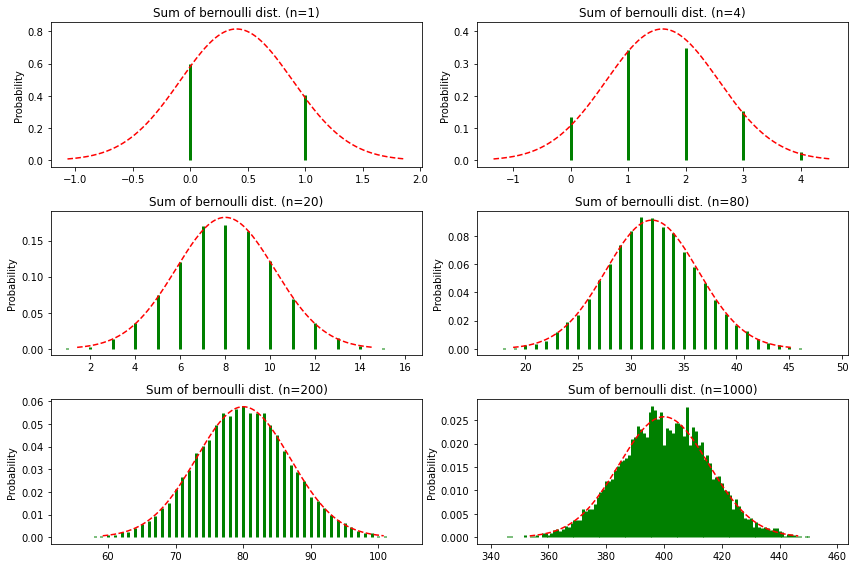

In [15]:
def sampling(n, dist, t):
    """
    对特定概率分布进行采样
    
    入参
    ____
    n: int
        每次试验时的抽样次数
    dist: distribution object
        冻结的分布函数
    t: int
        试验重复的次数
        
    返回值
    ______
    val, pmf: 元组
        采样值和采样频率
    """
 
    sum_of_samples = []
    for i in range(t):
        samples = dist.rvs(size=n)
        sum_of_samples.append(numpy.sum(samples))
    val, cnt = numpy.unique(sum_of_samples, return_counts=True)
    pmf = cnt / len(sum_of_samples)
    return val, pmf

def dist2norm(size, b, dist, dist_type=None):
    """
    用连续采样之和逼近正态分布
    
    入参
    ____
    size: int list
        每次采样的样本数列表
    b: int
        每次试验中采样的次数
    dist: 
        用于逼近的概率分布
        
    返回值
    ______
        无
    """
    if (dist_type == None):
        name = "Some Distribute"
    else:
        name = dist_type
    fig = plt.figure(figsize=(12,8))
    for i in range(len(size)):
        ax = fig.add_subplot(321+i)
        mu = size[i] * dist.mean()
        sigma = numpy.sqrt(size[i]  * dist.var())
        samples = sampling(size[i], dist, b)
        ax.vlines(samples[0], 0, samples[1],
                   colors='g', linestyles='-', lw=3)
        ax.set_ylabel('Probability')
        ax.set_title('Sum of {} dist. (n={})'.format(name, size[i]))
        # normal distribution
        norm_dis = stats.norm(mu, sigma)
        norm_x = numpy.linspace(mu - 3 * sigma, mu + 3 * sigma, b)
        pdf1 = norm_dis.pdf(norm_x)
        ax.plot(norm_x, pdf1, 'r--')

    plt.tight_layout()
    '''
    if (dist_type != None):
        plt.savefig('sum_of_{}_{}.png'.format(b, dist_type), dpi=200)
    '''
    
# 每次试验的次数
size = [1, 4, 20, 80, 200, 1000]
scale = 10000
bernouli = stats.bernoulli(p=0.4)  # 定义一个伯努利分布

dist2norm(size, scale, bernouli, dist_type='bernoulli')

上图红色曲线表示用于逼近"多个取自伯努利分布的随机变量之和"的正态分布的概率密度曲线。由上图可以看到，当n（单次试验抛硬币的次数）等于20的时候，随机变量和的分布和对应的近似正态分布的形状已经高度重合。但是当n继续增大时，拟合程度反而有所下降，这是由于试验次数（下面代码中，函数sampling2pmf的参数t，相当于总的试验次数）和在x轴上分割的区间数（代码中第49行的bins）太小造成的。

t的大小就是最终"随机变量之和"这个新随机变量的取样个数（因此总共抛硬币𝑡∗𝑛次）。

当n=1时，该随机变量就是伯努利分布本身，这时只有两个可能的取值：0和1，因此1出现了𝑡𝑝次，0出现了𝑡(1−𝑝)次。

当n=20时，该随机变量是20个服从伯努利分布的随机变量之和。这时的可能取值为[0, 20]的整数。0就表示这20次试验全都背面朝上，20就表示这20次试验全都正面朝上。每次试验都可以得到一个位于区间[0, 20]的整数，试验结束后，最终得到了t个这样的整数，这些整数的直方图的形状也近似为正态分布的形状。

通过改变plot的bins参数可以得到不同的结果。增加试验次数和在x轴上分割区间的个数后，随机变量之和与正态分布之间的重合度随着样本量（在代码的54行定义）的增加而升高。这也很容易解释：对于随机变量和的分布，抽样次数（试验次数）越多，最终画出来的图越能代表整个分布，但是抽样次数本身却不影响该分布的类型和参数。就像在学校研究全体同学的身高，抽样的人数不会影响身高的真实分布，只会影响我们利用所得的样本描绘出来的分布的形状。

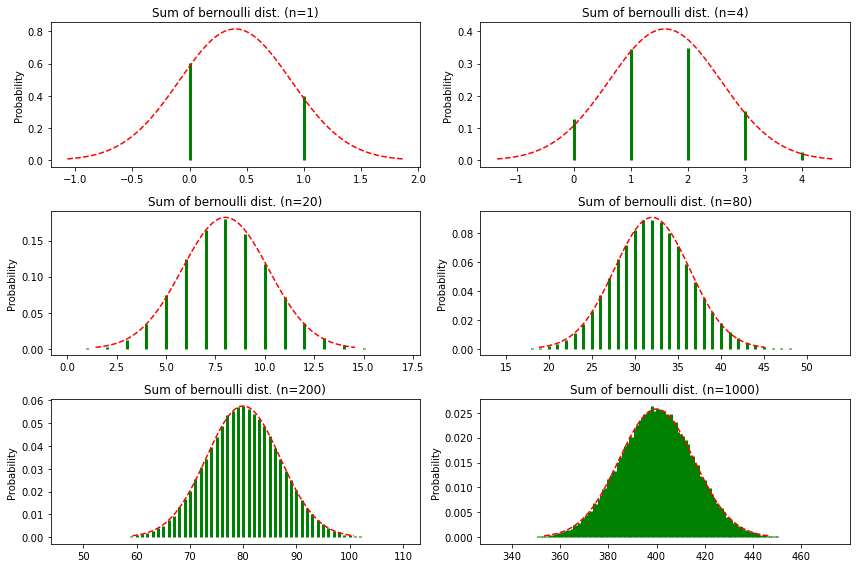

In [124]:
scale = 100000
bern2norm(size, scale)

由上图可以看到，增加试验次数和在x轴上分割区间的个数后，随机变量之和与正态分布之间的重合度随着样本量（在代码的54行定义）的增加而升高。这也很容易解释：对于随机变量和的分布，抽样次数（试验次数）越多，最终画出来的图越能代表整个分布，但是抽样次数本身却不影响该分布的类型和参数。就像在学校研究全体同学的身高，抽样的人数不会影响身高的真实分布，只会影响我们利用所得的样本描绘出来的分布的形状。

此外，还有一个因素对随机变量和的分布也有极大的影响：单次试验所在分布的参数，这里是指伯努利分布中的参数𝑝，下面是将𝑝从0.4增加到0.99后的图形：



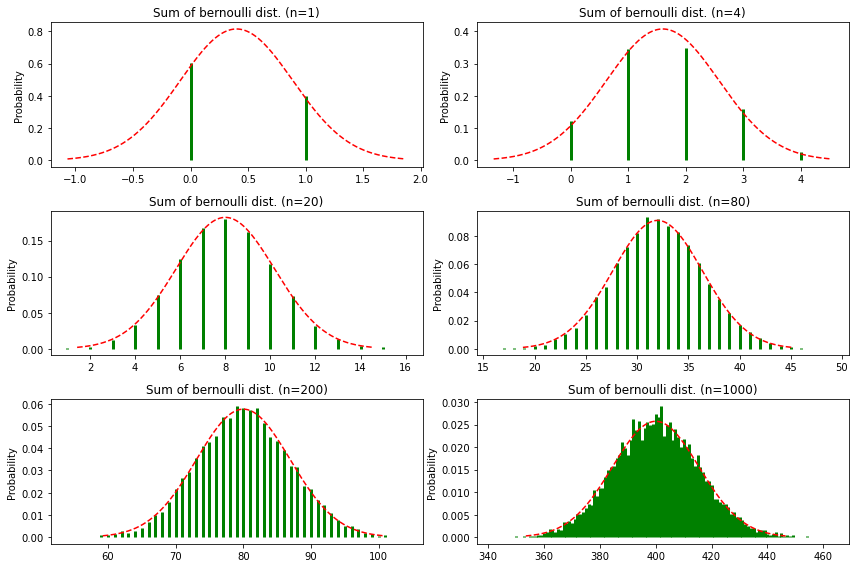

In [17]:
bernouli = stats.bernoulli(p=0.4)  # 定义一个伯努利分布

dist2norm(size, scale, bernouli, dist_type='bernoulli')

由上图可以看到，由于单个样本所在的伯努利分布严重不均匀（如果这个试验表示抛硬币且正面朝上记为1，那就意味着99%的情况下都只出现正面），导致后面随机变量之和的图形都出现了偏斜。但是，偏斜程度随着样本量的增加而降低。如果样本量继续增加，就会基本消除这种偏斜。

 
2.2.2 模拟服从二项分布的随机变量之和

这就相当于多个人做抛硬币的试验（正反面朝上还是分别记为1和0），这些试验结果之和就表示所有人的试验中出现正面朝上的总次数。

设单次二项试验服从𝐵(𝑚,𝑝)，参与人数为n，那么这些试验结果之和近似服从𝑁(𝑛𝑚𝑝,𝑛𝑚𝑝(1−𝑝))。其中𝑛𝑚𝑝表示均值𝜇，𝑛𝑚𝑝(1−𝑝)表示方差${𝜎^2}$。

只需要将上面代码中的57-59行替换成下面的代码就可以模拟出二项分布之和的情况：

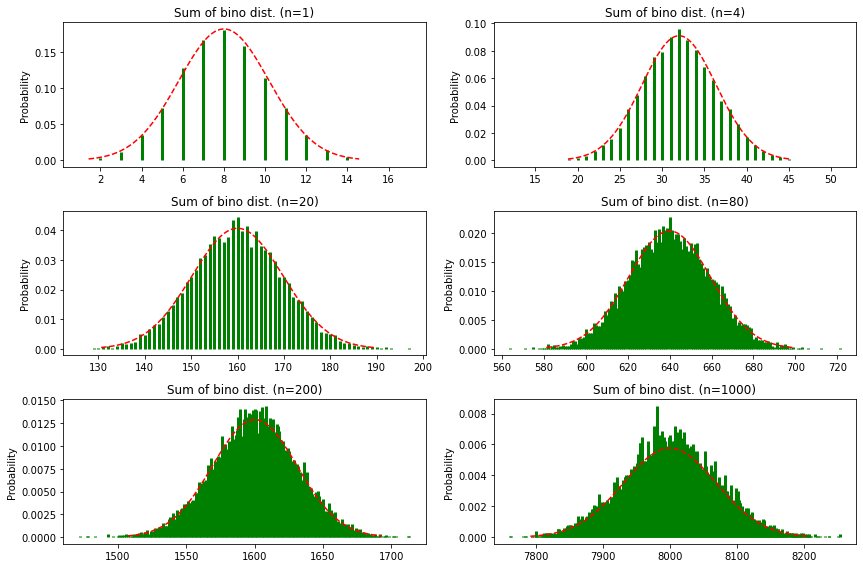

In [16]:
bino_para = [20, 0.4]
bino_dist = stats.binom(n=bino_para[0], p=bino_para[1])  # 定义一个二项分布
dist2norm(size, 10000, bino_dist, dist_type = 'bino')

图2-4，n依次等于1, 4, 20, 80, 200, 1000；参数为(20, 0.4)的二项分布之和

图片中的n表示每次试验参加的人数，每个人做单次试验时，试验服从𝐵(20，0.4)。

当n=1时，就相当于图2-1中n=20的情况：都是一个人重复"抛20次硬币"这一试验，正面朝上的概率也相同。

当n=80时，就相当于有80个人同时做服从参数为(20, 0.4)的二项分布试验，这些人之间的试验是相互独立的，然后将这些人的实验结果相加：所以此时的均值为80*20*0.4=640，标准差为${\sqrt{80∗20∗0.4∗(1−0.4)}≈19.6}$，且最大值为80*20=1600（相当于所有人的试验结果全部都是1），最小值为0（相当于所有人的试验结果都是0）。

宏观解释：当非常多的人一起重复结果服从上述二项分布的试验时，每次抛硬币最可能得到正面朝上的概率始终都是𝑝，
因此这些人完成一次试验的结果之和的期望就是：人数 * 每人单次试验抛硬币数 * 硬币正面朝上的概率，即𝑛∗20∗0.4。
得到硬币正面朝上的结果小于这个概率，会导致试验结果之和小于平均值；反之则会使试验结果之和大于平均值。
但是这两种情况都没有以概率𝑝出现更常见，因此就产生了取到均值的概率最大，越往两边概率越小的钟型概率密度曲线。

模拟服从均匀分布的随机变量之和

还是假设每次有n个人参与服从𝑈[𝑎,𝑏]的均匀分布，则求和就相当于将这些人的试验结果相加，那么这些试验结果之和近似服从
${𝑁(\frac{𝑛(𝑏−𝑎)}{2}, \frac{{𝑛(𝑏−𝑎)}^2}{12})}$。其中${\frac{𝑛(𝑏−𝑎)}{2}}$表示均值𝜇，${\frac{𝑛(𝑏−𝑎)^2}{12}}$表示方差${𝜎^2}$（近似正态分布的参数都是原均匀分布参数的n倍，参考式2-4）。

取参数为[3, 5]的均匀分布，可得：
    
    ## 图

使用前面模拟离散型随机变量和的方法无法模拟连续型随机变量和的极限分布，这是因为连续型随机变量的取值是无穷多的，单个点的概率等于0，即使大量重复取样每个结果的概率都还是会非常小（因为每个值都不同），根本无法看到累积的效果。可以将x轴进行分区，将出现在同一个区域的观察值当做相同的值来对待，这样就跟离散型随机变量的情况一样了（将无穷多的可能取值转化成了有限个区域的取值）。下面使用hist函数实现了这一方式，并且将bins设置为100。

对于本次试验的均匀分布，每次取值为区间[3,5]上的任意实数，且取到这些实数的概率是相等的。

当n=1时，相当于只有一个人进行服从该均匀分布的试验，试验次数为函数“sampling2pmf”中的参数“t”，即100000次。由于将区间[3,5]
等分为100份，因此这些观察值也应该均匀的分布在这100个区间内，即每个小区间中会有大约1000个观察值。由于总长度为2，此时整个矩形区域的面积为1000∗2=2000，如果标准化为频率可得到每个小区间中观察值出现的频率为观察值个数除以总面积，即1000/2000=0.5。最终结果就得到了左上角的图形。此时相当于均值和方差都相同的正态分布（红色虚线）和均匀分布（蓝色区域）的比较，相差还是非常大的。

当n=8时，相当于有8个人同时做该试验，每次试验完成后将这些人的观察值相加，试验𝑡次，就可以得到𝑡个相加的观察值。由于每次试验从均匀分布中取值，这8个人的试验结果也应该大致服从均匀分布，这些值几乎均匀的分布在区间[3,5]上。因此其和约等于人数乘以均匀分布的均值，即8∗4=32，这也是n=8时，随机变量和的期望值。该期望值是这8个人的结果之和最有可能出现的值，因此概率最大；大于该值或小于该值的概率表示这些人的取值会偏向均值的右侧或左侧，因此概率会减小。

宏观解释：多人试验时，有些人取到较大的值，有些人取到较小的值，因此总的来说这些值的和接近人数乘以均匀分布的均值，得到这个位置的值的概率最大，为图形中的顶点。所有人的取值同时小于或大于均值的概率是比较小的，因此顶点两侧的概率降低了，且越往两侧概率越小。取到极小值（极大值）表示所有人都取到了均匀分布中的最小值3（最大值5），这几乎是不可能的。

下面是代码实现：

In [32]:
0.005*100*2


1.0

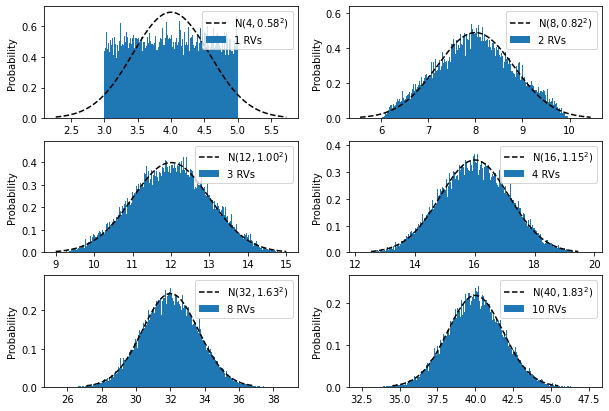

In [33]:
size = [1, 2, 3, 4, 8, 10]
uniform_dist = stats.uniform(loc=3, scale=2)  # 定义一个[3, 5]区间上的均匀分布
t = 1000000

fig = plt.figure(figsize=(10, 7))
for s in range(len(size)):
    n = size[s]
    mu = n * uniform_dist.mean()
    sigma = numpy.sqrt(n * uniform_dist.var())
    ax = fig.add_subplot(321+s)
    sum_of_samples = numpy.zeros(t)
    for i in range(t):
        sum_of_samples[i] = numpy.sum(uniform_dist.rvs(n))
  
    ax.hist(sum_of_samples, density=True, bins=10000, label='{} RVs'.format(n))
    ax.set_ylabel('Probability')

    # Frozened正态分布
    norm_dis = stats.norm(mu, sigma)
    norm_x = numpy.linspace(mu - 3 * sigma, mu + 3 * sigma, 10000)
    pdf = norm_dis.pdf(norm_x)
    ax.plot(norm_x, pdf, 'k--', label='N(${0:.0f}, {1:.2f}^2$)'.format(mu, sigma))
    ax.legend(loc='upper right')

plt.show()

 

后记：

写到这里，似乎任何分布之和（只要项数足够多）都服从正态分布。但是就是在上面链接的末尾处看到了一个例外：任意多的服从柯西分布的随机变量之和还是服从原来的柯西分布。后面查了一些资料证实了这一点，可以参考这里。有了这一个例外，可能就无法排除还有其他的例外，只是这种情况应该很少见，平时的数据分析中也很少会遇到服从柯西分布的数据（物理学除外）。因此也不用担心中心极限定理突然失灵。大数定理部分，写于大约两年前，当时发布在新浪博客（reference中最后一个链接），转载时做了一些小的修改。



## 抽样分布

统计量的分布被称为抽样分布。

当总体𝑋服从一般分布（如指数分布、均匀分布等），要得出统计量的分布是很困难的；当总体𝑋服从正态分布时，统计量${\bar{𝑋}}$、${𝑆^2}$是可以计算的，且服从一定的分布。这些分布就是下面要介绍的三大抽样分布——𝜒2分布，𝑡分布，𝐹分布。

抽样分布就是统计量的分布，其特点是不包含未知参数且尽可能多的概括了样本信息。除了常见的正态分布之外，还有卡方分布、t分布和F分布为最常见的描述抽样分布的分布函数。这几个分布函数在数理统计中也非常有名。我们常说的卡方检验、t检验和F检验就跟这三个分布有关。下面分别从定义、性质、函数图像和分位数等方面介绍三大分布。

### 分位点/分位数（Fractile）

分位数是一个非常重要的概念，一开始也有点难理解。首先要明确一点，分位数分的是面积。更准确的说，分位数分的是某个特定分布的概率密度函数曲线下的面积。每给定一个分位数，这个概率密度函数曲线就被该点一分为二。

在英语中，表示分位数的有两个词，它们的区别如下：

    As nouns the difference between fractile and quantile is that fractile is (statistics) the value of a distribution for which some fraction of the sample lies below while quantile is (statistics) one of the class of values of a variate which divides the members of a batch or sample into equal-sized subgroups of adjacent values or a probability distribution into distributions of equal probability. 

摘自，https://wikidiff.com/fractile/quantile

因此，从上面的描述可以看出来这里所说的分位点是指fractile。其实还有一个词，percentile，这个词好像用的更多。

**四分位数（Quartiles）**

四分位数是平时用的比较多的概念，属于quantile的一种。对于一组数据来说，四分位数就是将这组数据排序后，均分为4部分的3个分割点位置的数值。例如1， 3， 5， 7， 9， 11，其3个四分位点分别是3，6，9。分别叫做第一四分位数（Q1），第二四分位数（Q2），第三四分位数（Q3）。

对于概率密度函数来说，四分位点就是将概率密度曲线下的面积均分为4部分的点。
 
**上𝛼分位数（Upper Percentile）**

上𝛼分位数是概率密度函数定义域内的一个数值，这个数值将概率密度函数曲线下的面积沿x轴分成了两个部分，其中该点右侧部分概率密度函数曲线与x轴围成的面积等于𝛼。

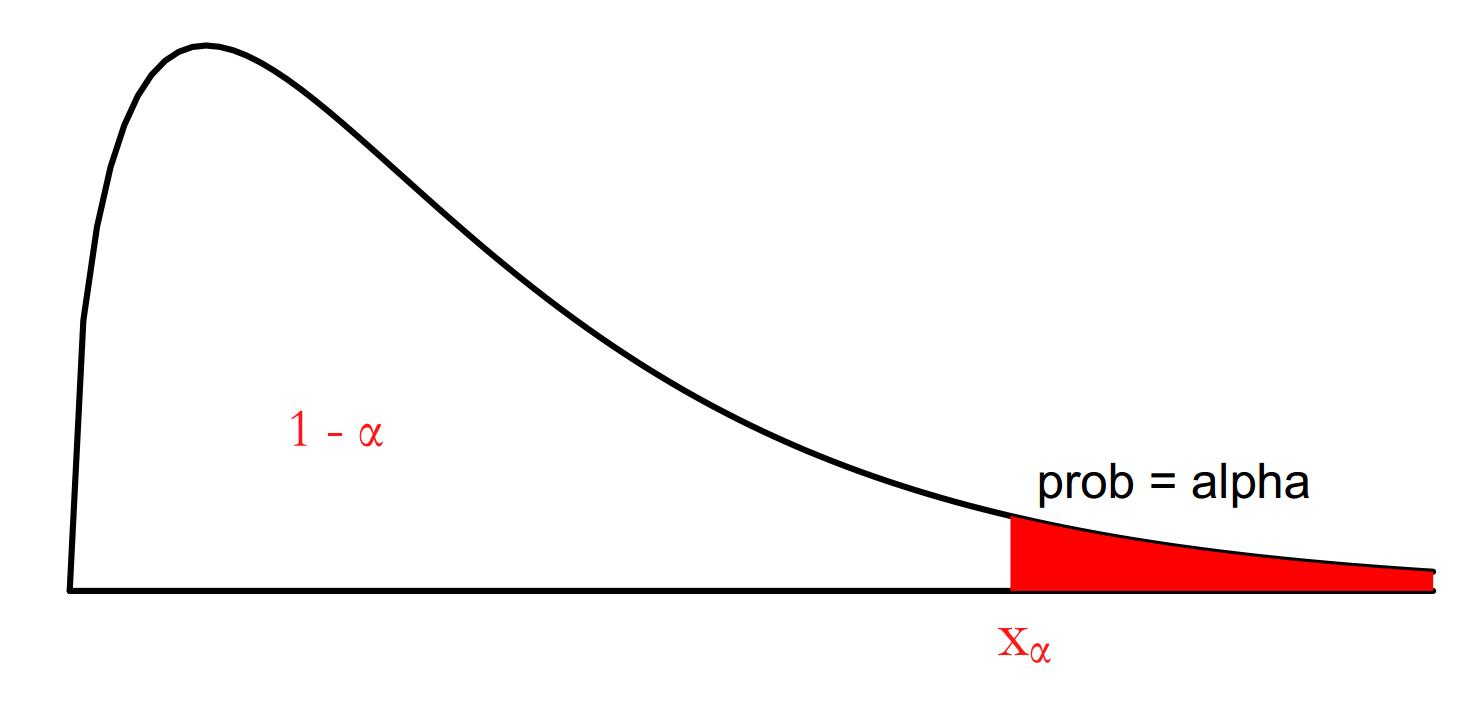

图1，某分布的上𝛼分位数，𝑥𝛼

由于概率密度函数曲线下的面积就是概率，因此上𝛼分位数中的𝛼就是该点右侧区域的面积（图1红色区域），也是在这个分布中取到所有大于该点的值的概率。在假设检验中这个概率就是我们通常说的P值。

参考图1，${𝑃(𝑋\geq 𝑥_𝛼)=𝛼}$

此时有两个值，一个是𝛼，另一个是${𝑥_𝛼}$。这两个值中确定其中一个，另一个值也就确定了。因此我们可以通过一个给定的𝛼值，
求在某个特定分布中的上𝛼分位数，即${𝑥_𝛼}$的值；也可以在某个特定分布中，任意给定一个定义域内的点${𝑥_1}$，求取到比该点的值更大的值的概率，
即 ${𝑃(𝑋\geq 𝑥_1)}$ 的值。


### 卡方分布 ${({\chi})^2}$

从其名称中可以看到，卡方分布跟平方有关。事实也是这样，卡方分布是由服从标准正态分布的随机变量的平方和组成的。

 
**定义**

设随机变量 ${𝑋_1,𝑋_2,...,𝑋_𝑛}$ 相互独立，都服从${𝑁(0,1)}$，则称
$${{\chi}^2=\sum_{𝑖=1}^{𝑛}𝑋_{i}^{2}}$$
服从自由度为n的${{\chi}^2}$分布，记为${{\chi}^2～{\chi}^2{n}}$

自由度是指上式右端包含的独立变量的个数。

 
**性质**

设 ${{\chi}^2～{\chi}^2{n}}$，则
* ${𝐸({\chi}^2)=𝑛，𝐷({\chi}^2)=2𝑛}$；
* ${{\chi}^2}$分布的可加性：设${𝑌_1∼{\chi}^2(𝑛_1),𝑌_2∼{\chi}^2(𝑛_2)}$，且${𝑌_1,𝑌_2}$相互独立，则 ${𝑌_1+𝑌_2∼{\chi}^2(𝑛_1+𝑛_2)}$。
该性质可以推广到有限个随机变量的情形，设 ${𝑌_1,...,𝑌_𝑚}$ 相互独立，${𝑌_𝑖∼{\chi}^2(𝑛_𝑖)}$，则${\sum_{𝑖=1}^{𝑚}𝑌_𝑖={\chi}^2(\sum_{𝑖=1}^{𝑚}𝑛_𝑖)}$


**函数图像**

卡方分布的概率密度曲线代码如下：

[ 5.92104075 19.33742923 45.31474662]
True


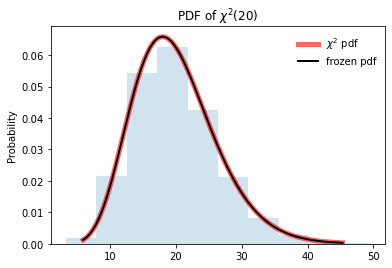

In [34]:
def chi2_distribution(df=1):
    """
    卡方分布pdf，
    在实际的定义中只有一个参数df，即定义中的n
    
    入参
    ____
    df: int
        自由度，也就是该分布中独立变量的个数
    
    返回值
    ______
        无
    """

    fig, ax = plt.subplots(1, 1)

    x = np.linspace(stats.chi2.ppf(0.001, df),
                    stats.chi2.ppf(0.999, df), 200)
    ax.plot(x, stats.chi2.pdf(x, df), 'r-',
            lw=5, alpha=0.6, label=r'$\chi^2$ pdf')

    # 从冻结的均匀分布取值, 
    chi2_dis = stats.chi2(df=df)
    ax.plot(x, chi2_dis.pdf(x), 'k-',
            lw=2, label='frozen pdf')

    # 计算ppf分别等于0.001, 0.5, 0.999时的x值
    vals = chi2_dis.ppf([0.001, 0.5, 0.999])
    print(vals)  # [ 2.004  4.     5.996]

    print(np.allclose([0.001, 0.5, 0.999], chi2_dis.cdf(vals)))

    r = chi2_dis.rvs(size=10000)
    ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
    plt.ylabel('Probability')
    plt.title(r'PDF of $\chi^2$({})'.format(df))
    ax.legend(loc='best', frameon=False)
    plt.show()

chi2_distribution(df=20)

其实在scipy对卡方分布的说明中，卡方分布还有其他两个参数，loc和scale，默认情况下，𝑙𝑜𝑐=0， 𝑠𝑐𝑎𝑙𝑒=1

。这时相当于是一个标准化的卡方分布，可以根据loc和scale对函数进行平移和缩放。官方文档是这样描述的：

    The probability density above is defined in the “standardized” form. To shift and/or scale the distribution use the loc and scale parameters. Specifically, chi2.pdf(x, df, loc, scale) is identically equivalent to chi2.pdf(y, df) / scale with y = (x - loc) / scale.

 

不同参数的卡方分布
当自由度df等于1或2时，函数图像都呈单调递减的趋势；当df大于等于3时，呈先增后减的趋势。从定义上来看，df的值只能取正整数，但是实际上传入小数也可以做出图像（此时的df不知道该如何解释）。

图3的Python实现代码如下：

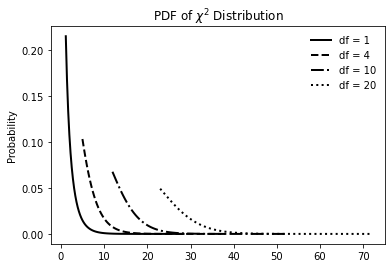

In [40]:
fig, ax = plt.subplots(1, 1)

line_style = ['-', '--', '-.', ':']
dfs = [1, 4, 10, 20]

for i in range(4):
    chi2_dis = stats.chi2(df=dfs[i])
    x = numpy.linspace(chi2_dis.ppf(0.71),
                       chi2_dis.ppf(0.9999999),
                       100)
    ax.plot(x, chi2_dis.pdf(x),c='k',
            ls=line_style[i], lw=2,
            label='df = {}'.format(dfs[i]))
plt.ylabel('Probability')
plt.title(r'PDF of $\chi^2$ Distribution')
ax.legend(loc='best', frameon=False)
plt.show()

**分位数的计算**

第一种情况：给定上分位数${𝑥_1}$，求概率𝑃(𝑋≥𝑥1)，这也是用的比较多的情况（在假设检验中计算P值）。
按照上分位数的定义，如果要计算比𝑥1更大的取值的概率，只需要计算1−𝑐𝑑𝑓(𝑥1)就可以得到。

参考图2，我们分别计算在卡方分布${{\chi}^2(20)}$中，𝑥=20以及𝑥=40时对应的𝛼值（或P值）。

In [47]:
print(1 - stats.chi2.cdf(20, 20), 1 - stats.chi2.cdf(40, 20))

0.45792971447185216 0.0049954123083075785


上面的cdf函数有两个参数，第一个位置是𝑥的值，第二个位置是𝑑𝑓的值（degree of freedom，卡方分布的自由度）。从图2中也可以看到，20基本上位于卡方分布𝜒2(20)的PDF图像中间的位置，该位置右边基本上占了整个PDF的一半；40

这个值非常靠右，该值右边的面积非常小，计算得出在该分布中只有大约0.5%的值大于40。

由于计算某个分布下特定𝑥
的𝛼值在统计的应用中非常重要，因此有专门的函数来做相关的计算，这个专门的函数在𝛼值非常小的情况下（即𝑥

的值在图像中非常靠右），计算出来的结果比上面的方法更精确。

下面是官方文档的说明：

    Survival function (also defined as 1 - cdf, but sf is sometimes more accurate).


In [48]:
stats.chi2.sf(20, 20)

0.4579297144718523

In [49]:
stats.chi2.sf(40, 20)

0.0049954123083075785

In [50]:
stats.chi2.sf(100, 20)

1.2596084591660847e-12

In [51]:
1 - stats.chi2.cdf(100, 20)

1.2596590437397026e-12

In [52]:
1 - stats.chi2.cdf(1000, 20)

0.0

In [53]:
stats.chi2.sf(1000, 20)

3.9047966391213445e-199

从上面可以看到，当𝑥=1000时，用第一种方法的精度已经不够用了，但是第二种方法还是可以计算出一个非零的数值。 

在介绍分位数时，说过在某个分布中，${𝑥_𝛼}$与𝛼知道其中一个，就可以计算出另一个值来。
上面的方法是已知${𝑥_𝛼}计算𝛼，下面是根据𝛼的值，求对应的${𝑥_𝛼}，即上𝛼分位数。


In [54]:
stats.chi2.isf(0.995, 20)

7.433844262934232

In [55]:
stats.chi2.isf(0.95, 20)

10.850811394182585

In [56]:
stats.chi2.isf(0.5, 20)

19.337429229428256

In [57]:
stats.chi2.isf(0.05, 20)

31.41043284423092

In [58]:
stats.chi2.isf(0.005, 20)

39.99684631293865

看到0.05这样的值是不是很熟悉？其实这个过程就是我们学统计时查表的过程，通常概率论与数理统计方面的书后面的附表都会有常见分布的"上侧分位点表"。有了Python，我们以后就不需要翻书查表了。

参考这里：https://www.medcalc.org/manual/chi-square-table.php

这里的𝛼
就相当于假设检验中的𝑝值。

**分布上侧分位点${{\chi}^2(a)}$表**

|na|0.995|0.975|0.20|0.10|0.05|0.025|0.02|0.01|0.005|0.002|0.001|
|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|
|1|0.0000393|0.000982|1.642|2.706|3.841|5.024|5.412|6.635|7.879|9.550|10.828|
|2|0.0100|0.0506|3.219|4.605|5.991|7.378|7.824|9.210|10.597|12.429|13.816|
|3|0.0717|0.216|4.642|6.251|7.815|9.348|9.837|11.345|12.838|14.796|16.266|
|4|0.207|0.484|5.989|7.779|9.488|11.143|11.668|13.277|14.860|16.924|18.467|
|5|0.412|0.831|7.289|9.236|11.070|12.833|13.388|15.086|16.750|18.907|20.515|
|6|0.676|1.237|8.558|10.645|12.592|14.449|15.033|16.812|18.548|20.791|22.458|
|7|0.989|1.690|9.803|12.017|14.067|16.013|16.622|18.475|20.278|22.601|24.322|

### t分布

t分布的推导最早由大地测量学家Friedrich Robert Helmert于1876年提出，并由数学家Lüroth证明。英国人威廉·戈塞（Willam S. Gosset）于1908年再次发现并发表了t分布，当时他还在爱尔兰都柏林的吉尼斯（Guinness）啤酒酿酒厂工作。酒厂虽然禁止员工发表一切与酿酒研究有关的成果，但允许他在不提到酿酒的前提下，以笔名发表t分布的发现，所以论文使用了“学生”（Student）这一笔名。之后t检验以及相关理论经由罗纳德·费雪（Sir Ronald Aylmer Fisher）发扬光大，为了感谢戈塞的功劳，费雪将此分布命名为学生t分布（Student's t）。

**定义**

设${𝑋∼𝑁(0,1),𝑌∼{\chi}^2(𝑛)}$，且X和Y相互独立，则称随机变量${𝑇=\frac{𝑋}{\sqrt{𝑌/𝑛}}}$服从自由度为n的t分布，记为${𝑇∼𝑡(𝑛)}$。
* 当n=1的t分布，就是柯西分布

**性质**

设${𝑇∼𝑡(𝑛)}$，则 
* 当${𝑛>1}$时，𝐸(𝑇)=0，当𝑛=1时，期望不存在（参考柯西分布的期望，link）
* 当${𝑛>2}$时，𝐷(𝑇)=𝑛𝑛−2，当𝑛≤2时，方差不存在

[-3.55180834e+00  6.72145055e-17  3.55180834e+00]
True


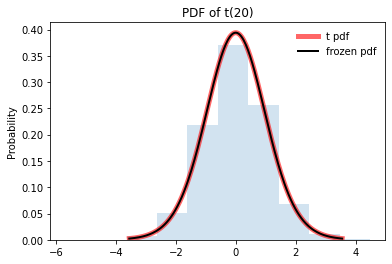

In [59]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
# http://user.engineering.uiowa.edu/~dbricker/Stacks_pdf1/Sampling_Distns.pdf
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html


def t_distribution(df=1.0):
    """
    t分布，在实际的定义中只有一个参数df，即定义中的n
    :param df: 自由度，也就是该分布包含的卡方分布中独立变量的个数
    :return:
    """

    fig, ax = plt.subplots(1, 1)

    # 直接传入参数, Display the probability density function (pdf)
    x = np.linspace(stats.t.ppf(0.001, df),
                    stats.t.ppf(0.999, df), 200)
    ax.plot(x, stats.t.pdf(x, df), 'r-',
            lw=5, alpha=0.6, label=r't pdf')

    # 从冻结的t分布取值, Freeze the distribution and display the frozen pdf
    t_dis = stats.t(df=df)
    ax.plot(x, t_dis.pdf(x), 'k-',
            lw=2, label='frozen pdf')

    # 计算ppf分别等于0.001, 0.5, 0.999时的x值
    vals = t_dis.ppf([0.001, 0.5, 0.999])
    print(vals)  # [ -3.55180834e+00   6.72145055e-17   3.55180834e+00]

    # Check accuracy of cdf and ppf
    print(np.allclose([0.001, 0.5, 0.999], t_dis.cdf(vals)))  # Ture

    # Generate random numbers
    r = t_dis.rvs(size=10000)
    ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
    plt.ylabel('Probability')
    plt.title(r'PDF of t({})'.format(df))
    ax.legend(loc='best', frameon=False)
    plt.show()

t_distribution(df=20)

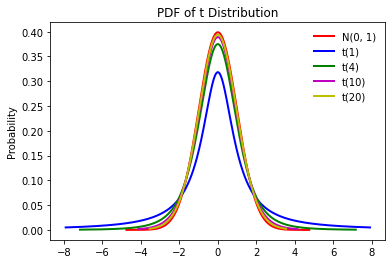

In [60]:
def diff_t_dis():
    """
    不同参数下的t分布
    :return:
    """
    norm_dis = stats.norm()
    t_dis_1 = stats.t(df=1)
    t_dis_4 = stats.t(df=4)
    t_dis_10 = stats.t(df=10)
    t_dis_20 = stats.t(df=20)

    x1 = np.linspace(norm_dis.ppf(0.000001), norm_dis.ppf(0.999999), 1000)
    x2 = np.linspace(t_dis_1.ppf(0.04), t_dis_1.ppf(0.96), 1000)
    x3 = np.linspace(t_dis_4.ppf(0.001), t_dis_4.ppf(0.999), 1000)
    x4 = np.linspace(t_dis_10.ppf(0.001), t_dis_10.ppf(0.999), 1000)
    x5 = np.linspace(t_dis_20.ppf(0.001), t_dis_20.ppf(0.999), 1000)
    fig, ax = plt.subplots(1, 1)
    ax.plot(x1, norm_dis.pdf(x1), 'r-', lw=2, label=r'N(0, 1)')
    ax.plot(x2, t_dis_1.pdf(x2), 'b-', lw=2, label='t(1)')
    ax.plot(x3, t_dis_4.pdf(x3), 'g-', lw=2, label='t(4)')
    ax.plot(x4, t_dis_10.pdf(x4), 'm-', lw=2, label='t(10)')
    ax.plot(x5, t_dis_20.pdf(x5), 'y-', lw=2, label='t(20)')
    plt.ylabel('Probability')
    plt.title(r'PDF of t Distribution')
    ax.legend(loc='best', frameon=False)
    plt.show()

diff_t_dis()

从以上运行结果可以看到，𝑡(1)与标准正态分布之间的差别还是比较大的，但是当自由度n趋近于无穷大时，t分布与标准正态分布没有差别（公式上的形式将变得完全相同，这里没有列出概率密度函数的公式）。较大的区别在于，当自由度n较小时，t分布比标准正态分布的尾部更宽（fatter tails），因此也比正态分布更慢的趋近于0。关于这两类分布的异同将会在后面的假设检验部分详细阐述。


t分布中上𝛼分位数的计算

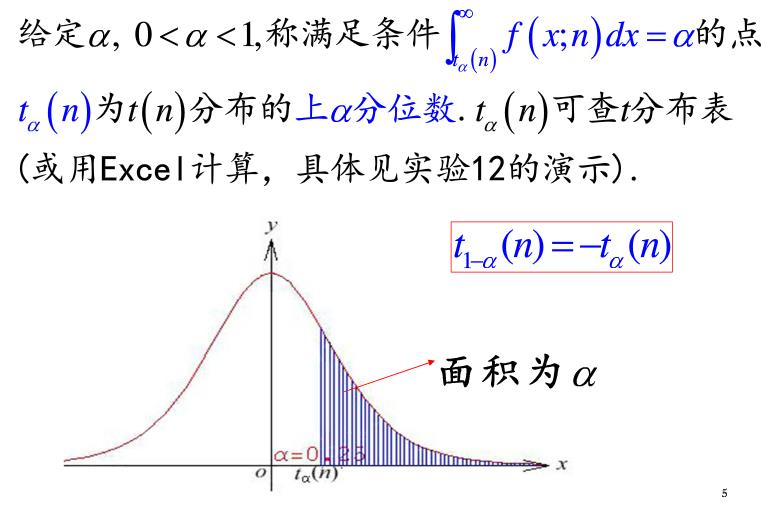



### F分布

F分布由两个卡方分布构成。

 
定义

设${𝑋∼{\chi}^2(𝑛_1)，𝑌∼{\chi}^2(𝑛_2)}$，且𝑋,𝑌相互独立，则称随机变量${𝐹=\frac{𝑋/𝑛_1}{𝑌/𝑛_2}}$ 服从自由度为${(𝑛_1,𝑛_2)}$的F分布，
记为${𝐹∼𝐹(𝑛_1,𝑛_2)}$。其中${𝑛_1}$称为第一自由度，${𝑛_2}$称为第二自由度。

性质

设${𝐹∼𝐹(𝑛,𝑚)}$，则
* ${𝐸(𝐹)=\frac{𝑚}{𝑚−2}}$，其中${𝑚 \geq 2}$，否则期望不存在
* ${𝐷(𝐹)=\frac{2𝑚^2(𝑛+𝑚−2)}{𝑛(𝑚−2)^2(𝑚−4)}}$，其中${𝑚\geq 4}$，否则方差不存在
* ${\frac{1}{𝐹}∼𝐹(𝑚,𝑛)}$，即F分布的倒数也是F分布（参数交换）

下面是F分布的Pyhon实现的代码，

[ 0.02081053  0.89881713 11.28275151]
True


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dip" which is no longer supported as of 3.3 and will become an error two minor releases later


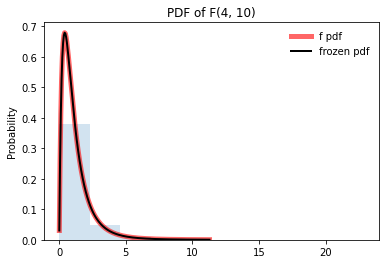

In [61]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


def f_distribution(dfn=4, dfd=10):
    """
    F分布，有两个参数dfn, dfd，分别表示定义中的n1和n2
    :param dfn: 第一自由度，分子中卡方分布的自由度
    :param dfd: 第二自由度，分母中卡方分布的自由度
    :return:
    """

    fig, ax = plt.subplots(1, 1)

    # 直接传入参数, Display the probability density function (pdf)
    x = np.linspace(stats.f.ppf(0.0001, dfn, dfd),
                    stats.f.ppf(0.999, dfn, dfd), 200)
    ax.plot(x, stats.f.pdf(x, dfn, dfd), 'r-',
            lw=5, alpha=0.6, label=r'f pdf')

    # 从冻结的均匀分布取值, Freeze the distribution and display the frozen pdf
    f_dis = stats.f(dfn=dfn, dfd=dfd)
    ax.plot(x, f_dis.pdf(x), 'k-',
            lw=2, label='frozen pdf')

    # 计算ppf分别等于0.001, 0.5, 0.999时的x值
    vals = f_dis.ppf([0.001, 0.5, 0.999])
    print(vals)  # [  0.02081053   0.89881713  11.28275151]

    # Check accuracy of cdf and ppf
    print(np.allclose([0.001, 0.5, 0.999], f_dis.cdf(vals)))  # Ture

    # Generate random numbers
    r = f_dis.rvs(size=10000)
    ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
    plt.ylabel('Probability')
    plt.title(r'PDF of F({}, {})'.format(dfn, dfd))
    ax.legend(loc='best', frameon=False)
    plt.savefig('f_dist_pdf2.png', dip=200)

f_distribution(dfn=4, dfd=10)

F分布有两个参数，dfn和dfd，分别代表分子上的第一自由度和分母上的第二自由度。

下面是不同参数下，F分布的概率密度函数图像：

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dip" which is no longer supported as of 3.3 and will become an error two minor releases later


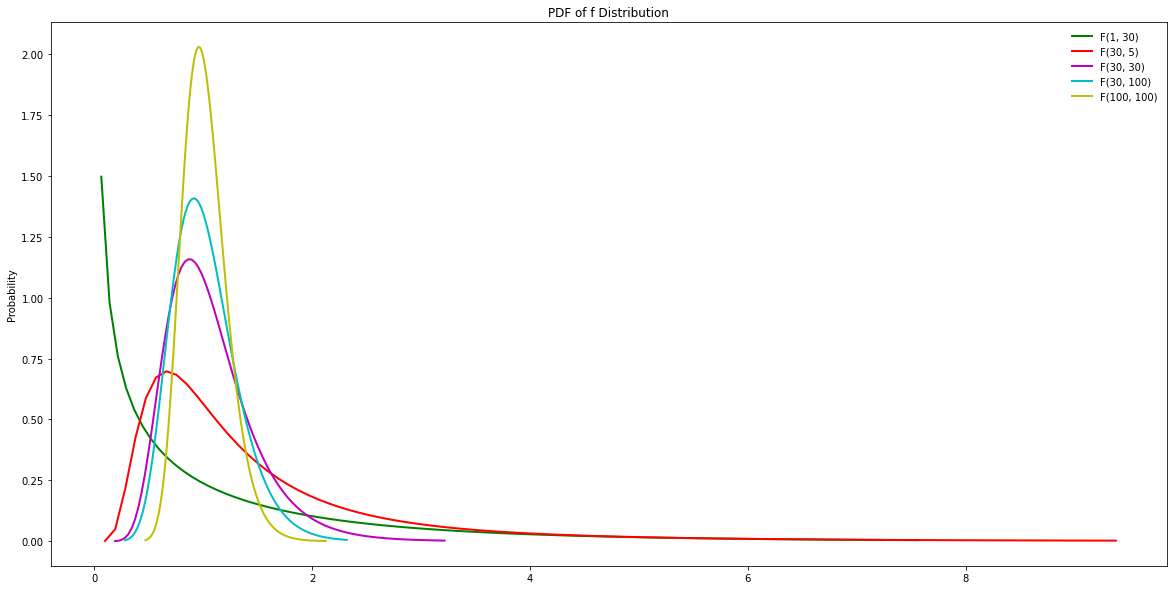

In [62]:
def diff_f_dis():
    """
    不同参数下的F分布
    :return:
    """
#    f_dis_0_5 = stats.f(dfn=10, dfd=1)
    f_dis_1_30 = stats.f(dfn=1, dfd=30)
    f_dis_30_5 = stats.f(dfn=30, dfd=5)
    f_dis_30_30 = stats.f(dfn=30, dfd=30)
    f_dis_30_100 = stats.f(dfn=30, dfd=100)
    f_dis_100_100 = stats.f(dfn=100, dfd=100)

#    x1 = np.linspace(f_dis_0_5.ppf(0.01), f_dis_0_5.ppf(0.99), 100)
    x2 = np.linspace(f_dis_1_30.ppf(0.2), f_dis_1_30.ppf(0.99), 100)
    x3 = np.linspace(f_dis_30_5.ppf(0.00001), f_dis_30_5.ppf(0.99), 100)
    x4 = np.linspace(f_dis_30_30.ppf(0.00001), f_dis_30_30.ppf(0.999), 100)
    x6 = np.linspace(f_dis_30_100.ppf(0.0001), f_dis_30_100.ppf(0.999), 100)
    x5 = np.linspace(f_dis_100_100.ppf(0.0001), f_dis_100_100.ppf(0.9999), 100)
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
#    ax.plot(x1, f_dis_0_5.pdf(x1), 'b-', lw=2, label=r'F(0.5, 0.5)')
    ax.plot(x2, f_dis_1_30.pdf(x2), 'g-', lw=2, label='F(1, 30)')
    ax.plot(x3, f_dis_30_5.pdf(x3), 'r-', lw=2, label='F(30, 5)')
    ax.plot(x4, f_dis_30_30.pdf(x4), 'm-', lw=2, label='F(30, 30)')
    ax.plot(x6, f_dis_30_100.pdf(x6), 'c-', lw=2, label='F(30, 100)')
    ax.plot(x5, f_dis_100_100.pdf(x5), 'y-', lw=2, label='F(100, 100)')

    plt.ylabel('Probability')
    plt.title(r'PDF of f Distribution')
    ax.legend(loc='best', frameon=False)
    plt.savefig('f_diff_pdf.png', dip=500)
    plt.show()

diff_f_dis()

### 三大抽样分布之间的联系

下面这个例子，可以展示这三大抽样分布于标准正态分布的联系，以及它们自身之间的联系：

𝑋,𝑌,𝑍相互独立，且都服从𝑁(0,1)分布，那么：

* ${X^2+Y^2+Z^2) \sim {\chi}^2(3)}$
* ${\frac{X}{\sqrt{(Y^2+Z^2)/2}} \sim t(2)}$
* ${\frac{2X^2}{Y^2+Z^2} \sim F(1,2)}$
* 若${t\sim t(n)}$, 那么${t^2 \sim F(1,n)}$


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dip" which is no longer supported as of 3.3 and will become an error two minor releases later


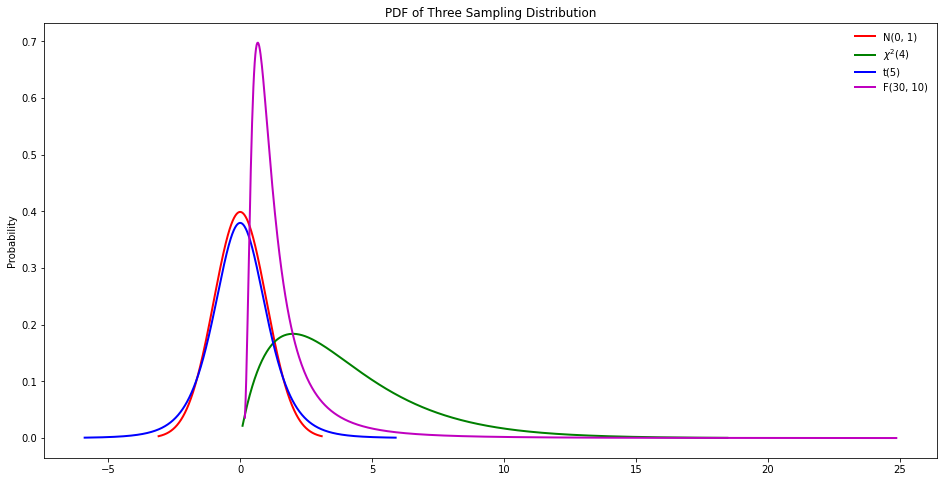

In [63]:
def three_sampling_dis():
    """
    三大抽样分布与标准正态分布
    :return:
    """
    nor_dis = stats.norm()
    chi2_dis = stats.chi2(df=4)
    t_dis = stats.t(df=5)
    f_dis = stats.f(dfn=30, dfd=5)

    x1 = np.linspace(nor_dis.ppf(0.001), nor_dis.ppf(0.999), 1000)
    x2 = np.linspace(chi2_dis.ppf(0.001), chi2_dis.ppf(0.999), 1000)
    x3 = np.linspace(t_dis.ppf(0.001), t_dis.ppf(0.999), 1000)
    x4 = np.linspace(f_dis.ppf(0.001), f_dis.ppf(0.999), 1000)
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    ax.plot(x1, nor_dis.pdf(x1), 'r-', lw=2, label=r'N(0, 1)')
    ax.plot(x2, chi2_dis.pdf(x2), 'g-', lw=2, label=r'$\chi^2$(4)')
    ax.plot(x3, t_dis.pdf(x3), 'b-', lw=2, label='t(5)')
    ax.plot(x4, f_dis.pdf(x4), 'm-', lw=2, label='F(30, 10)')

    plt.ylabel('Probability')
    plt.title(r'PDF of Three Sampling Distribution')
    ax.legend(loc='best', frameon=False)
    plt.savefig('diff_dist_pdf.png', dip=500)
    plt.show()

three_sampling_dis()

从运行结果可以看到，t分布和标准正态分布都是左右对称的，偏度为0（偏度为0也可能不对称），但是卡方分布和F分布都不对称，呈正偏态（右侧的尾部更长，分布的主体集中在左侧）。

## 全概率和贝叶斯公式



### 贝叶斯公式

与全概率公式解决的问题相反，贝叶斯公式是建立在条件概率的基础上寻找事件发生的原因（即大事件A已经发生的条件下，分割中的小事件Bi在A发生的条件下的概率），设B1,B2,...是样本空间S的一个划分，则对任一事件A（P(A)>0），有
$${P(B_i|A)=\frac{P(B_i)P(A|B_i)}{\sum_{j=i}^{n}P(B_j)P(A|B_j)}}$$

上式即为贝叶斯公式(Bayes formula)，Bi 常被视为导致试验结果A发生的“原因”，P(Bi)(i=1,2,...)表示各种原因发生的可能性大小，故称先验概率（权重）；P(Bi|A)(i=1,2...)则反映当试验产生了结果A之后，再对各种原因概率的新认识，故称后验概率。

如果参考图2，分成两步来看，B发生在A之前，且B有多种情况（B1 - Bn）。在运用贝叶斯公式时，一般已知和未知条件为：

* B的多种情况中到底哪种情况发生了是未知的，但是每种情况发生的概率已知，即P(Bj)；
* 事件A是已经发生的确定事实，且每种B发生条件下A发生的概率已知，即P(A|Bj)；
* P(A)未知，需要使用全概率公式计算得到；
* 求解的目标是用B的某种情况Bi的无条件概率求其在A发生的条件下的有条件概率P(Bi|A) 

下面我们举个例子：
在这一系列数据中计算出在第三个子数据集中发生1事件的概率：

In [63]:
#创建一个虚拟的事件集
event_set=[
        [1,2,3,5,1],#数据中包含四个子数据
        [1,2,1,1,8,8],
        [1,7,2,3,5],
        [4,8,9,1,1,8,9,3]
]

def get_total_probability(event_set, event):
    """
    计算某一事件A发生的全概率
    
    入参
    ____
    event_set: list
        事件集
    event： int
        事件编号
    
    返回值
    ______
    prob_event: float
        该事件全概率
    """

    prob_event = 0.0
    for sub_dataset in event_set:
        prob_sub=1/len(dataset)           # 该子集发生的概率
        num=len(sub_dataset)         
        data_dict = {}        
        for data in sub_dataset:
            data_dict[data] = data_dict.get(data, 0) + 1

        prob = 0.0
        if event in data_dict:
            prob += data_dict[event]/num  # 事件在该子集中的出现概率
        else:
            print("没有该事件")

        prob_event += prob*prob_sub

    return prob_event#返回事件的全概率


def probability_sub_eventset(eventset, subset_id, event):
    """
    计算事件A发生条件下第几个子空间发生的概率
    
    入参
    ____
    eventset: list
        事件集
    subset_id: int
        子集编号
    event： int
        事件编号
    
    返回值
    ______
    prob_event: float
        该子集的后验概率
    
    """
    
    """
    事件发生在某一子集的概率，即此子集在空间中分布概率
    """
    prob_subset = 1 / len(dataset)
    print("子集 %d 的概率：%f" % (subset_id, prob_subset))
    
    #  事件在子空间中发生的概率    
    event_num = eventset[subset_id].count(event)   
    prob_sub_dataset_event=event_num/len(dataset[subset_id])
    print("在子集#%d中发生事件No.%d的概率：%f"%(subset_id, event, prob_sub_dataset_event))
    
    prob_event = get_total_probability(eventset, event)
    print("整个样本发生事件No.%d的概率：%f"%(event, prob_event))
    
    #事件发生在某一子集中的概率
    prob_sub_dataset=(prob_subset*prob_sub_dataset_event)/prob_event
    print("事件No.%d发生在子集#%d的概率为：%f"%(event, subset_id, prob_sub_dataset))
    
    return prob_sub_dataset


probability_sub_eventset(event_set, 2, 1)#1出现在第三个子集中的概率

子集 2 的概率：0.250000
在子集#2中发生事件No.1的概率：0.200000
整个样本发生事件No.1的概率：0.337500
事件No.1发生在子集#2的概率为：0.148148


0.14814814814814814

#### 朴素贝叶斯分类器的公式

假设某个体有n项特征，分别为${F_1、F_2、...F_n}$。现有m个分类，分别为${C_1、C_2、...C_m}$。贝叶斯分类器就是计算出概率最大的那个分类，也就是求下面这个算式的最大值：
$${P(C|F_1F_2...F_n) = \frac{P(F_1F_2...F_n|C)P(C)}{P(F_1F_2...F_n)}}$$
其中，${C取C_1、C_2、...C_m}$。
由于${P(F_1F_2...F_n)}$对于所有的类别都是相同的，可以省略，问题就变成了求,
${P(F_1F_2...F_n|C)P(C)}$

朴素贝叶斯假定所有的特征值相互独立，因此：
$${P(F_1F_2...F_n|C)P(C) = {P(F_1|C)P(F_2|C)...P(F_n|C)P(C)}/{P(F_1)P(F_2)...P(F_n)}}$$

上式等号右边的每一项，都可以从统计资料中得到，由此就可以计算出每个类别对应的概率，从而找出最大概率的那个类。
虽然"所有特征彼此独立"这个假设，在现实中不太可能成立，但是它可以大大简化计算，而且有研究表明对分类结果的准确性影响不大。

接下来通过知道一个人的身高、体重以及脚的尺寸，去判断这个人是男是女。 

|性别|身高（英尺）|体重（磅）|脚的尺寸（英寸）|
|:---:|:---:|:---:|:---:|
|男|6|180|12|
|男|5.92|190|11|
|男|5.58|170|12|
|男|5.92|165|10|
|女|5|100|6|
|女|5.5|150|8|
|女|5.42|130|7|
|女|5.75|150|9|

问题是： 
现有一身高6英尺，体重130磅，脚尺寸为8英寸的人，这个人是男是女呢？

我们先做一点微小的数据可视化工作：

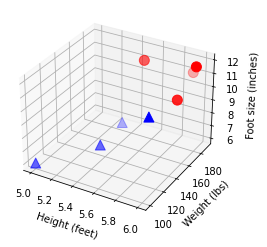

In [2]:
#!/usr/bin/python3
import numpy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
# 身高、体重、脚尺寸数据
data = numpy.array([[6, 5.92, 5.58, 5.92, 5, 5.5, 5.42, 5.75],
                    [180, 190, 170, 165, 100, 150, 130, 150],
                    [12, 11, 12, 10, 6, 8, 7, 9]])
 
# 男性用红色园圈表示
ax.scatter(data[0][:4], data[1][:4], data[2][:4], c='r', marker='o', s=100)
# 女性用蓝色三角表示
ax.scatter(data[0][4:], data[1][4:], data[2][4:], c='b', marker='^', s=100)
 
ax.set_xlabel('Height (feet)')
ax.set_ylabel('Weight (lbs)')
ax.set_zlabel('Foot size (inches)')
 
# 显示散点图
plt.show()

通过上图我们大概可以看出身高6英尺，体重130磅，脚尺寸为8英寸的人很大概率是个女性。

接着我们就要通过贝叶斯分类器来检测来人是男性还是女性。男性和女性出现的概率可以认为是相等的，都是0.5。无论男女，每一个特征都满足正态分布。以身高为例
$${p(h|male)=\frac{1}{\sqrt{2\pi \delta_h ^2}}exp \left (\frac{-(h- \mu_h)^2}{2\delta_h ^2} \right )}$$
这里是概率密度而不是概率，因为身高是一个连续的变量。

后验概率由以下公式计算：
$${posterior(G)= \frac{P(gendor)p(height|G)p(weight|G)p(foot|G)}{evidence}} \qquad G: gendor $$

$$ {evidence= P(male)p(height|male)p(weight|male)p(foot|male) + P(female)p(height|female)p(weight|female)p(foot|female)}$$

$${P(male)=P(female)=0.5}$$

首先，我们需要计算样本中各项指标的均值和标准差，代码实现如下：

In [105]:
from __future__ import unicode_literals
from scipy import stats

stats_male = [u"男性"]
stats_female = [u"女性"]
ndata = numpy.array(data, order = 'F') 
with numpy.nditer(ndata, flags = ['external_loop'], order = 'C') as it:
    for x in it:
        stats_male.append(numpy.mean(x[:4]))
        stats_male.append(numpy.std(x[:4], ddof=1))   # 求样本标准差，
        stats_female.append(numpy.mean(x[4:]))
        stats_female.append(numpy.std(x[4:], ddof=1)) # 因此减少一个自由度

# 输出统计数据
import prettytable
tb = prettytable.PrettyTable() 
tb.field_names = [u"性别", u" 身高 ", u" 标准差（身高）",
                  u" 均值（体重）", u" 标准差（体重）",
                  u" 平均值（脚码)", u" 标准差（脚码）"]
tb.add_row(stats_male)
tb.add_row(stats_female)
tb.align = "l"
tb.align["Gendor"] = "c"
tb.padding_width = 1
print(tb)

+------+--------+---------------------+---------------+--------------------+----------------+--------------------+
| 性别 |  身高  |  标准差（身高）     |  均值（体重） |  标准差（体重）    |  平均值（脚码) |  标准差（脚码）    |
+------+--------+---------------------+---------------+--------------------+----------------+--------------------+
| 男性 | 5.855  | 0.18717193521821937 | 176.25        | 11.086778913041726 | 11.25          | 0.9574271077563381 |
| 女性 | 5.4175 | 0.3118092365533773  | 132.5         | 23.629078131263043 | 7.5            | 1.2909944487358056 |
+------+--------+---------------------+---------------+--------------------+----------------+--------------------+


以上代码中需要注意的是，由于使用的是样本空间，因此在计算方差和标准差时需要减少一个自由度。代码中后一部分是将统计数据格式化输出。

由于身高、体重和脚码均满足正态分布，因此接下的代码利用各自的均值和标准差计算概率密度。

In [106]:
p = numpy.empty((2,3))  # 概率密度
param = [6, 130, 8]     # 身高、体重、脚码
for j in range(3):
    p[0][j] = stats.norm.pdf(param[j], 
                             stats_male[2*j+1],
                             stats_male[2*j+2])

for j in range(3):
    p[1][j] = stats.norm.pdf(param[j], 
                             stats_female[2*j+1],
                             stats_female[2*j+2])

print(p)

# 性别判断
if (numpy.prod(p[0]) > numpy.prod(p[1])):
    print('这很可能是一位男性')
else:
    print('这很可能是一位女性')

[[1.57888318e+00 5.98674302e-06 1.31122104e-03]
 [2.23458727e-01 1.67892979e-02 2.86690700e-01]]
这很可能是一位男性


**水果分类**

考虑到水果的三个特征：

* 长短
* 甜或不甜
* 是否为黄色

现在有以下统计数据：

|类别|较长|不长|甜|不甜|黄色|不是黄色|总数|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|香蕉|400|100|350|150|450|50|500|
|橘子|0|300|150|150|300|0|300|
|其他水果|100|100|150|50|50|150|200|
|总数|500|500|650|350|800|200|1000|

根据贝叶斯分类器公式，我们需要做的是，在知道上诉特征的情况下，判断这个水果是香蕉、橘子还是其他，写成公式，如下：
${P(F|LSC) = P(LSC|F)P(F)/P(LSC)}$

根据上诉推导，我们只需求如下等式的最大值
${P(L|F)P(S|F)P(C|F)P(F)}$

其中，F->水果, L->长度, S->甜度,C->颜色
根据样本数据，各种概率如下有：

假设，我们有一个水果，它有如下特征，较长，不甜，黄色，请问它最有可能是什么水果？

首先，我们自定义一个结构化数据类型来描述每一行的数据，并生成结构化数据数组。代码如下

In [224]:
import numpy

fruit = numpy.dtype([('class', numpy.str),
                     ('long', numpy.int), ('not_long', numpy.int),
                     ('sweet', numpy.int), ('not_sweet', numpy.int),
                     ('yellow', numpy.int), ('not_yellow', numpy.int),
                     ('total', numpy.int)])
attr =  numpy.dtype([('long', numpy.float), ('not_long', numpy.float),
                     ('sweet', numpy.float), ('not_sweet', numpy.float),
                     ('yellow', numpy.float), ('not_yellow', numpy.float)])
fruit_data = numpy.array([('banana', 400, 100, 350, 150, 450, 50,500),
                         ('orange', 0, 300, 150, 150, 300, 0, 300),
                         ('other_fruit', 100, 100, 150, 50, 50, 150, 200)], dtype = fruit)
label = {'banana':0, 'orange':1, 'other_fruit':2}
fruit_data

array([('', 400, 100, 350, 150, 450,  50, 500),
       ('',   0, 300, 150, 150, 300,   0, 300),
       ('', 100, 100, 150,  50,  50, 150, 200)],
      dtype=[('class', '<U'), ('long', '<i8'), ('not_long', '<i8'), ('sweet', '<i8'), ('not_sweet', '<i8'), ('yellow', '<i8'), ('not_yellow', '<i8'), ('total', '<i8')])

当然，我们也可以将数据保存在CSV文件中，利用函数numpy.genfromtxt()自动生成类似的数组。

接下来，我们一个函数将所有水果的所有特性的分布概率计算出来。代码如下：

In [246]:
def get_base_rate():
    p_f = numpy.empty((3,), dtype=attr )
    field = ['long', 'not_long', 'sweet', 'not_sweet', 'yellow', 'not_yellow']
    for i in range(3):
        for j in (field):
            p_f[i][j] = fruit_data[i][j]/fruit_data[i]['total']
    return p_f 

此时只需要将各种水果出现的概率算出来，就可以根据具体的属性计算后验概率了。代码如下：

In [249]:
def get_label(sweet, length, corlor):
    fruit_rate = fruit_data['total']/numpy.sum(fruit_data['total'])
    p = get_base_rate()
    likelyhood = {}
    for l in label.keys():
        idx = label[l]
        pr = p[idx][sweet]*p[idx][length]*p[idx][corlor]*fruit_rate[idx]
        likelyhood[l] = pr
    return likelyhood

接下来，我们写一段测试代码验证以上代码：

In [254]:
import operator
import random

def random_attr(pair):
    return pair[random.randint(0,1)]

def gen_attrs():
    # 生成测试数据集
    sets= [('long','not_long'),('sweet','not_sweet'),('yellow','not_yellow')]
    test_datasets = []
    for _ in range(20):
        test_datasets.append(list(map(random_attr,sets)))
    return test_datasets

if __name__ == "__main__":
    test_datas = gen_attrs()
    for data in test_datas:
        print("特征值：")
        print(data)
        res = get_label(data[0], data[1], data[2])
        print("后验概率值：")
        print(res)
        print("预测结果是：")
        print(sorted(res.items(),
                     key=operator.itemgetter(1),
                     reverse=True)[0][0])
    

特征值：
['not_long', 'not_sweet', 'not_yellow']
后验概率值：
{'banana': 0.003, 'orange': 0.0, 'other_fruit': 0.018750000000000003}
预测结果是：
other_fruit
特征值：
['not_long', 'not_sweet', 'yellow']
后验概率值：
{'banana': 0.027, 'orange': 0.15, 'other_fruit': 0.00625}
预测结果是：
orange
特征值：
['long', 'not_sweet', 'not_yellow']
后验概率值：
{'banana': 0.012, 'orange': 0.0, 'other_fruit': 0.018750000000000003}
预测结果是：
other_fruit
特征值：
['long', 'sweet', 'not_yellow']
后验概率值：
{'banana': 0.027999999999999997, 'orange': 0.0, 'other_fruit': 0.05625}
预测结果是：
other_fruit
特征值：
['long', 'not_sweet', 'yellow']
后验概率值：
{'banana': 0.108, 'orange': 0.0, 'other_fruit': 0.00625}
预测结果是：
banana
特征值：
['not_long', 'sweet', 'not_yellow']
后验概率值：
{'banana': 0.006999999999999999, 'orange': 0.0, 'other_fruit': 0.05625}
预测结果是：
other_fruit
特征值：
['not_long', 'sweet', 'yellow']
后验概率值：
{'banana': 0.063, 'orange': 0.15, 'other_fruit': 0.018750000000000003}
预测结果是：
orange
特征值：
['long', 'not_sweet', 'not_yellow']
后验概率值：
{'banana': 0.012, 'orange': 0.0, 'ot

## 10.4	练习

In [1]:
from scipy import stats
X = stats.binom(10, 0.2) # Declare X to be a binomial random variable
print(X.pmf(3))           # P(X = 3)
print(X.cdf(4))           # P(X <= 4)
print(X.mean())           # E[X]
print(X.var())            # Var(X)
print(X.std())            # Std(X)
print(X.rvs())            # Get a random sample from X
print(X.rvs(10))          # Get 10 random samples form X

0.20132659200000022
0.9672065024000001
2.0
1.6
1.2649110640673518
0
[3 1 3 3 0 2 2 4 2 3]


In [ ]:
#2
import math
from scipy import stats
A = stats.norm(3, math.sqrt(16)) # Declare A to be a normal random variable
print(A.pdf(4))       			 # f(3), the probability density at 3
print(A.cdf(2))       			 # F(2), which is also P(Y < 2)
print(A.rvs())        			 # Get a random sample from A

In [ ]:
#3
from scipy import stats
Y = stats.poisson(2)  # Declare Y to be a poisson random variable
print(Y.pmf(3))       # P(Y = 3)
print(Y.rvs())        # Get a random sample from Y

In [ ]:
#4
from scipy import stats
X = stats.geom(0.75)  # Declare X to be a geometric random variable
print(X.pmf(3))       # P(X = 3)
print(X.rvs())        # Get a random sample from Y

In [2]:
#5
import random

def random_list(n, secure=True):
    random_floats = []
    if secure:
        crypto = random.SystemRandom()
        random_float = crypto.random
    else:
        random_float = random.random
    for _ in range(n):
        random_floats.append(random_float())
    return random_floats

print(random_list(10, secure=False))

[0.265510354804006, 0.059088600445998285, 0.7526479264148589, 0.6091961218406359, 0.4380242419323538, 0.6571182321652871, 0.8740329084661487, 0.9437678245970134, 0.8580734195245397, 0.6541687911426172]


In [3]:
# 6
from random import SystemRandom
sr = SystemRandom() # create an instance of the SystemRandom class
    

def generate_password(length, 
                      valid_chars=None):
    """ generate_password(length, check_char) -> password
        length: the length of the created password
        check_char: a Boolean function used to check the validity of a char
    """
    if valid_chars==None:
        valid_chars = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
        valid_chars += valid_chars.lower() + "0123456789"
    
    password = ""
    counter = 0
    while counter < length:
        rnum = sr.randint(0, 128)
        char = chr(rnum)
        if char in valid_chars:
            password += chr(rnum)
            counter += 1
    return password

print("Automatically generated password by Python: " + generate_password(15))

Automatically generated password by Python: clVd0OFnP9z9Sqo


**参考文档**

Introduction to Probability, 2nd Edition 
http://www.athenasc.com/probbook.html



https://www.cnblogs.com/Belter/p/8330773.html